# Library

In [18]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import time

In [19]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [ ]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏ†ï
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

# ÏùåÏàò ÌëúÌòÑ
plt.rcParams['axes.unicode_minus'] = False

In [20]:
start_time = time.time()

# Fold

In [572]:
raw_fold = 'D:/data/multi_road/raw'
an_fold = 'D:/data/multi_road/analysis'
img_fold = 'D:/data/multi_road/img'

# Load

## ÏõêÍ≤©Ï∏°Ï†ïÏ†ïÎ≥¥

In [22]:
rsd_cdict = {
    'vdfDateTime':'Í≤ÄÏÇ¨ÎÇ†Ïßú',
    'vdfTime':'Í≤ÄÏÇ¨ÏãúÍ∞Ñ',
    'vdfRecordStatus':'Í∏∞Î°ùÏÉÅÌÉú',
    'vdfValid':'Ïú†Ìö®',
    'samSpeed':'ÏÜçÎèÑ',
    'samAccel':'Í∞ÄÏÜçÎèÑ',
    # 'samFlag':'ÌîåÎûòÍ∑∏',
    'Smoke':'Îß§Ïó∞',
    'V_PLATE':'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏',
}
len(rsd_cdict)

8

In [23]:
# # 18s
# name = 'Îß§Ïó∞RSD ÎèÑÎ°úÏ∏°Ï†ïÎç∞Ïù¥ÌÑ∞_20221004~20230330'
# file_name = f'{name}.xlsx'
# rsd = pd.read_excel(os.path.join(raw_fold, file_name))

# 1s
name = 'Îß§Ïó∞RSD ÎèÑÎ°úÏ∏°Ï†ïÎç∞Ïù¥ÌÑ∞_20221004~20230330'
file_name = f'{name}.csv'
rsd = pd.read_csv(os.path.join(raw_fold, file_name), usecols=rsd_cdict.keys())
rsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31633 entries, 0 to 31632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vdfDateTime      31633 non-null  object 
 1   vdfTime          31633 non-null  object 
 2   vdfRecordStatus  31633 non-null  object 
 3   vdfValid         31633 non-null  object 
 4   samSpeed         31615 non-null  float64
 5   samAccel         31615 non-null  float64
 6   Smoke            31633 non-null  float64
 7   V_PLATE          31498 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.9+ MB


In [24]:
rsdr = rsd.rename(columns=rsd_cdict)
rsdr.columns

Index(['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'Îß§Ïó∞', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'], dtype='object')

### [Ï∂úÎ†•] csv

In [25]:
# # 1s
# rsd.to_csv(os.path.join(raw_fold, f'{name}.csv'), index=False)

## Îì±Î°ùÏ†ïÎ≥¥

In [224]:
car_cdict = {
    'VIN':'Ï∞®ÎåÄÎ≤àÌò∏', 
    # 'BSPL_STDG_CD':'Î≤ïÏ†ïÎèôÏΩîÎìú', 
    'EXHST_GAS_GRD_CD':'Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏â', 
    'EXHST_GAS_CERT_NO':'Î∞∞Ï∂úÍ∞ÄÏä§Ïù∏Ï¶ùÎ≤àÌò∏',
    'VHCL_ERSR_YN':'Ï∞®ÎüâÎßêÏÜåYN',
    'MANP_MNG_NO':'Ï†úÏõêÍ¥ÄÎ¶¨Î≤àÌò∏', 
    'YRIDNW':'Ï∞®ÎüâÏó∞Ïãù', 
    'VHCTY_CD':'Ï∞®Ï¢Ö', 
    # 'PURPS_CD2':'Ïö©ÎèÑ', 
    'FRST_REG_YMD':'ÏµúÏ¥àÎì±Î°ùÏùºÏûê',
    # 'VHCL_MNG_NO':'Ï∞®ÎüâÍ¥ÄÎ¶¨Î≤àÌò∏', 
    'VHRNO':'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏',
    # 'VHCL_OWNR_CL_CD':'ÏÜåÏú†ÏûêÍµ¨Î∂Ñ', 
    'VHCL_FBCTN_YMD':'Ï∞®ÎüâÏ†úÏûëÏùºÏûê'
}
len(car_cdict)

10

In [225]:
# 2m 30s
name = 'STD_CEG_CAR_MIG(20230821)'
file_name = f'{name}.csv'
car = pd.read_csv(os.path.join(raw_fold, file_name), usecols=car_cdict.keys())
car.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_19580\2069508936.py:4: DtypeWarning: Columns (8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  car = pd.read_csv(os.path.join(raw_fold, file_name), usecols=car_cdict.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30625663 entries, 0 to 30625662
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   EXHST_GAS_CERT_NO  object
 1   EXHST_GAS_GRD_CD   object
 2   FRST_REG_YMD       object
 3   MANP_MNG_NO        object
 4   VHCL_ERSR_YN       object
 5   VHCL_FBCTN_YMD     object
 6   YRIDNW             int64 
 7   VHCTY_CD           object
 8   VIN                object
 9   VHRNO              object
dtypes: int64(1), object(9)
memory usage: 2.3+ GB


In [286]:
# 4s
carr = car.rename(columns=car_cdict)
carr.columns

Index(['Î∞∞Ï∂úÍ∞ÄÏä§Ïù∏Ï¶ùÎ≤àÌò∏', 'Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏â', 'ÏµúÏ¥àÎì±Î°ùÏùºÏûê', 'Ï†úÏõêÍ¥ÄÎ¶¨Î≤àÌò∏', 'Ï∞®ÎüâÎßêÏÜåYN', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê', 'Ï∞®ÎüâÏó∞Ïãù',
       'Ï∞®Ï¢Ö', 'Ï∞®ÎåÄÎ≤àÌò∏', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'],
      dtype='object')

## Ï†úÏõêÏ†ïÎ≥¥

In [29]:
src_cdict = {
    'MANP_MNG_NO':'Ï†úÏõêÍ¥ÄÎ¶¨Î≤àÌò∏', 
    'FUEL_CD':'Ïó∞Î£å',
    # 'VHCTY_CD':'Ï∞®Ï¢Ö', 
    'VHCTY_TY_CD2':'Ï∞®Ï¢ÖÏú†Ìòï', 
    'MNFCTR_NM':'Ï†úÏûëÏÇ¨Î™Ö', 
    'VHCNM':'Ï∞®Î™Ö', 
    'VHCL_FRM':'ÏûêÎèôÏ∞®ÌòïÏãù', 
    'EGIN_TY':'ÏóîÏßÑÌòïÏãù', 
    'VHCTY_CL_CD':'Ï∞®Ï¢ÖÎ∂ÑÎ•ò',
    'TOTL_WGHT':'Ï¥ùÏ§ëÎüâ',
    # 'CRYNG_WGHT':'Ï†ÅÏû¨Ï§ëÎüâ',
    'DSPLVL':'Î∞∞Í∏∞Îüâ', 
    'EGIN_OTPT':'ÏóîÏßÑÏ∂úÎ†•', 
}
len(src_cdict)

11

In [30]:
# 2s
name = 'STD_CEG_CAR_SRC_MIG(20230821)'
file_name = f'{name}.csv'
src = pd.read_csv(os.path.join(raw_fold, file_name), usecols=src_cdict.keys())
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566615 entries, 0 to 566614
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VHCL_FRM      536460 non-null  object 
 1   DSPLVL        530949 non-null  float64
 2   EGIN_OTPT     491335 non-null  float64
 3   EGIN_TY       517013 non-null  object 
 4   FUEL_CD       545937 non-null  object 
 5   MNFCTR_NM     559794 non-null  object 
 6   MANP_MNG_NO   566615 non-null  object 
 7   TOTL_WGHT     563088 non-null  float64
 8   VHCNM         566544 non-null  object 
 9   VHCTY_CL_CD   551140 non-null  object 
 10  VHCTY_TY_CD2  553038 non-null  object 
dtypes: float64(3), object(8)
memory usage: 47.6+ MB


In [31]:
srcr = src.rename(columns=src_cdict)
srcr.columns

Index(['ÏûêÎèôÏ∞®ÌòïÏãù', 'Î∞∞Í∏∞Îüâ', 'ÏóîÏßÑÏ∂úÎ†•', 'ÏóîÏßÑÌòïÏãù', 'Ïó∞Î£å', 'Ï†úÏûëÏÇ¨Î™Ö', 'Ï†úÏõêÍ¥ÄÎ¶¨Î≤àÌò∏', 'Ï¥ùÏ§ëÎüâ', 'Ï∞®Î™Ö',
       'Ï∞®Ï¢ÖÎ∂ÑÎ•ò', 'Ï∞®Ï¢ÖÏú†Ìòï'],
      dtype='object')

## Ï†ïÎ∞ÄÍ≤ÄÏÇ¨

In [32]:
eet_cdict = {
    'VIN':'Ï∞®ÎåÄÎ≤àÌò∏', 
    'PRCINSP_JGMT':'Í≤ÄÏÇ¨ÌåêÏ†ï', 
    'PREC_NLOD_SMO_MSTVL1':'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 
    'PREC_NLOD_SMO_JT_YN1':'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 
    'PREC_NLOD_SMO_PRMVL1':'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 
    'PRCINSP_MSRMT_MTHD_CD':'Í≤ÄÏÇ¨Î∞©Î≤ï', 
    'PRCINSP_KND_CD':'Í≤ÄÏÇ¨Ï¢ÖÎ•ò', 
    'PRCINSP_YMD':'Í≤ÄÏÇ¨ÏùºÏûê',
    # 'PRCINSP_DRVNG_DSTNC':'Ï£ºÌñâÍ±∞Î¶¨', 
}
len(eet_cdict)

8

In [33]:
# 2m
name = 'STD_TB_EET_HIS_ME(20230825)'
file_name = f'{name}.csv'
eet = pd.read_csv(os.path.join(raw_fold, file_name), usecols=eet_cdict.keys())
eet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102191938 entries, 0 to 102191937
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VIN                    object 
 1   PRCINSP_JGMT           object 
 2   PREC_NLOD_SMO_MSTVL1   float64
 3   PREC_NLOD_SMO_JT_YN1   object 
 4   PREC_NLOD_SMO_PRMVL1   float64
 5   PRCINSP_MSRMT_MTHD_CD  object 
 6   PRCINSP_KND_CD         object 
 7   PRCINSP_YMD            int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ GB


In [34]:
# 12s
eetr = eet.rename(columns=eet_cdict)
eetr.columns

Index(['Ï∞®ÎåÄÎ≤àÌò∏', 'Í≤ÄÏÇ¨ÌåêÏ†ï', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1', 'Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1', 'Í≤ÄÏÇ¨Î∞©Î≤ï', 'Í≤ÄÏÇ¨Ï¢ÖÎ•ò',
       'Í≤ÄÏÇ¨ÏùºÏûê'],
      dtype='object')

In [189]:
eetr['Í≤ÄÏÇ¨ÏùºÏûê'].describe()

count                        102191938
mean     2015-06-12 01:53:53.696120576
min                2002-05-20 00:00:00
25%                2010-10-23 00:00:00
50%                2015-12-23 00:00:00
75%                2020-07-18 00:00:00
max                2023-07-31 00:00:00
Name: Í≤ÄÏÇ¨ÏùºÏûê, dtype: object

# Preprocessing

## ÏõêÍ≤©Ï∏°Ï†ïÏ†ïÎ≥¥

In [35]:
rsdr.columns

Index(['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏãúÍ∞Ñ', 'Í∏∞Î°ùÏÉÅÌÉú', 'Ïú†Ìö®', 'ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'Îß§Ïó∞', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'], dtype='object')

In [36]:
rsdr['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].head()

0    60Ï†Ä3406
1    41Íµ¨0483
2    80Îü¨0579
3    94ÎàÑ0128
4    60Ïàò4386
Name: ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏, dtype: object

In [37]:
rsdr.shape, len(rsdr['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].unique())

((31633, 8), 18131)

In [38]:
rsdr['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].isnull().sum()

135

In [39]:
rsdr[rsdr['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] == '********'].shape

(9741, 8)

In [40]:
# A(Audit(Í≤ÄÏ¶ù)), C(Calibration), N(ÏùºÎ∞òÏ∏°Ï†ïÏÉÅÌÉú)
rsdr['Í∏∞Î°ùÏÉÅÌÉú'].value_counts(dropna=False)

Í∏∞Î°ùÏÉÅÌÉú
N    31615
C        9
A        9
Name: count, dtype: int64

In [41]:
rsdr['Ïú†Ìö®'].value_counts(dropna=False)

Ïú†Ìö®
V    31615
x       18
Name: count, dtype: int64

In [42]:
rsdr.loc[rsdr['Í∏∞Î°ùÏÉÅÌÉú'] == 'N', 'Ïú†Ìö®'].value_counts(dropna=False)

Ïú†Ìö®
V    31615
Name: count, dtype: int64

In [43]:
rsdr = rsdr[(rsdr['Í∏∞Î°ùÏÉÅÌÉú'] == 'N') & (rsdr['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] != '********') & (rsdr['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].isnull() == False)].reset_index(drop=True)
rsdr.shape

(21757, 8)

In [44]:
rsdr[['ÏÜçÎèÑ', 'Í∞ÄÏÜçÎèÑ', 'Îß§Ïó∞']].describe()

ÏÜçÎèÑ      Í∞ÄÏÜçÎèÑ       Îß§Ïó∞
count 21757.00 21757.00 21757.00
mean     49.15     0.02     1.39
std      43.31    10.70     2.92
min       0.00  -325.50     0.00
25%      43.30     0.00     0.30
50%      50.20     0.10     0.50
75%      56.30     0.40     0.90
max    2244.50   314.10    19.90

In [45]:
rsdr[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏãúÍ∞Ñ']].head()

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ
0  10-04-2022  10:31:20
1  10-04-2022  10:31:46
2  10-04-2022  10:31:58
3  10-04-2022  10:32:47
4  10-04-2022  10:34:03

In [46]:
rsdr[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏãúÍ∞Ñ']].isnull().sum()

Í≤ÄÏÇ¨ÎÇ†Ïßú    0
Í≤ÄÏÇ¨ÏãúÍ∞Ñ    0
dtype: int64

In [47]:
rsdr[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏãúÍ∞Ñ']].dtypes

Í≤ÄÏÇ¨ÎÇ†Ïßú    object
Í≤ÄÏÇ¨ÏãúÍ∞Ñ    object
dtype: object

In [48]:
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'] = rsdr['Í≤ÄÏÇ¨ÎÇ†Ïßú'] + ' ' + rsdr['Í≤ÄÏÇ¨ÏãúÍ∞Ñ']
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ']= pd.to_datetime(rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'])
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].head()

0   2022-10-04 10:31:20
1   2022-10-04 10:31:46
2   2022-10-04 10:31:58
3   2022-10-04 10:32:47
4   2022-10-04 10:34:03
Name: Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ, dtype: datetime64[ns]

In [49]:
rsdr['Í≤ÄÏÇ¨ÎÇ†Ïßú'] = pd.to_datetime(rsdr['Í≤ÄÏÇ¨ÎÇ†Ïßú'])

In [50]:
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.year
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïõî'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.month
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïùº'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.day
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïãú'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.hour
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Î∂Ñ'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.minute
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ï¥à'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.second
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº'] = rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ'].dt.weekday.map({0:'Ïõî', 1:'Ìôî', 2:'Ïàò', 3:'Î™©', 4:'Í∏à', 5:'ÌÜ†', 6:'Ïùº'})

In [51]:
rsdr.head()

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ  Í∞ÄÏÜçÎèÑ   Îß§Ïó∞  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏              Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ   
0 2022-10-04  10:31:20    N  V 71.60 0.00 0.60  60Ï†Ä3406 2022-10-04 10:31:20  \
1 2022-10-04  10:31:46    N  V 60.70 0.00 0.80  41Íµ¨0483 2022-10-04 10:31:46   
2 2022-10-04  10:31:58    N  V 50.60 0.40 0.70  80Îü¨0579 2022-10-04 10:31:58   
3 2022-10-04  10:32:47    N  V 53.30 1.40 0.90  94ÎàÑ0128 2022-10-04 10:32:47   
4 2022-10-04  10:34:03    N  V 36.10 0.50 0.70  60Ïàò4386 2022-10-04 10:34:03   

   Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïõî  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïùº  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïãú  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Î∂Ñ  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ï¥à Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº  
0      2022        10         4        10        31        20         Ìôî  
1      2022        10         4        10        31        46         Ìôî  
2      2022        10         4        10        31        58         Ìôî  
3      2022        10         4        10        32        47         Ìôî  
4      2022        10         4        10        34         3         Ìôî

In [52]:
rsdr['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº'].unique()

array(['Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'Ïõî'], dtype=object)

## Îì±Î°ùÏ†ïÎ≥¥

In [287]:
carr['Ï∞®ÎüâÎßêÏÜåYN'].value_counts(dropna=False)

Ï∞®ÎüâÎßêÏÜåYN
N    25795579
Y     4830084
Name: count, dtype: int64

In [288]:
# 9s
# ÎßêÏÜå Ï†úÍ±∞
carr = carr[carr['Ï∞®ÎüâÎßêÏÜåYN'] == 'N'].reset_index(drop=True)
carr.shape

(25795579, 10)

In [289]:
carr['ÏµúÏ¥àÎì±Î°ùÏùºÏûê'].dtype

dtype('O')

In [290]:
# 6s
# ÏµúÏ¥àÎì±Î°ùÏùºÏûê Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
carr['ÏµúÏ¥àÎì±Î°ùÏùºÏûê'] = pd.to_numeric(carr['ÏµúÏ¥àÎì±Î°ùÏùºÏûê'], errors='coerce')

In [291]:
carr.shape

(25795579, 10)

In [292]:
carr['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].dtype

dtype('O')

In [293]:
carr['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].isnull().sum()

362730

In [294]:
# 3s
carr['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'] = pd.to_numeric(carr['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'], errors='coerce')
carr['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].isnull().sum()

362731

In [295]:
# 1m 12s
# Ï§ëÎ≥µ Ï∞®ÎåÄÎ≤àÌò∏ Ï†úÍ±∞(ÏµúÏã† ÏµúÏ¥àÎì±Î°ùÏùºÏûê ÎÇ®Í∏∞Í∏∞)
carr = carr.sort_values('ÏµúÏ¥àÎì±Î°ùÏùºÏûê', ascending=False).drop_duplicates('Ï∞®ÎåÄÎ≤àÌò∏').reset_index(drop=True)
carr.shape

(25795319, 10)

In [296]:
# 11s
# Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏â ÏΩîÎìú Î≥ÄÌôò
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carr['Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏â'] = carr['Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏â'].replace(grd_dict)
carr['Î∞∞Ï∂úÍ∞ÄÏä§Îì±Í∏â'].unique()

array(['2', '1', nan, '3', '5', '4'], dtype=object)

In [297]:
# 7s
# Ï∞®Ï¢Ö ÏΩîÎìú Î≥ÄÌôò
cd_dict = {
    'A31M':'Ïù¥Î•ú', 
    'A31P':'ÏäπÏö©', 
    'A31S':'ÌäπÏàò', 
    'A31T':'ÌôîÎ¨º', 
    'A31V':'ÏäπÌï©'
}
carr['Ï∞®Ï¢Ö'] = carr['Ï∞®Ï¢Ö'].replace(cd_dict)
carr['Ï∞®Ï¢Ö'].unique()

array(['ÏäπÏö©', 'ÌôîÎ¨º', 'ÌäπÏàò', 'ÏäπÌï©'], dtype=object)

In [236]:
# ## Ïö©ÎèÑ ÏΩîÎìú Î≥ÄÌôò
# purps_dict = {
#     'A08P':'Í∞úÏù∏Ïö©', 
#     'A08B':'ÏòÅÏóÖÏö©', 
#     'A08O':'Í¥ÄÏö©',
# }
# carr['Ïö©ÎèÑ'] = carr['Ïö©ÎèÑ'].replace(purps_dict)
# carr['Ïö©ÎèÑ'].unique()

In [237]:
# ## ÏÜåÏú†ÏûêÍµ¨Î∂Ñ ÏΩîÎìú Î≥ÄÌôò
# ownr_dict = {
#     'A27B':'ÏÇ¨ÏóÖÏûê', 
#     'A27F':'Ïô∏Íµ≠Ïù∏', 
#     'A27L':'Î≤ïÏù∏', 
#     'A27O':'Í∏∞ÌÉÄ', 
#     'A27R':'Ï£ºÎØº', 
# }
# carr['ÏÜåÏú†ÏûêÍµ¨Î∂Ñ'] = carr['ÏÜåÏú†ÏûêÍµ¨Î∂Ñ'].replace(ownr_dict)
# carr['ÏÜåÏú†ÏûêÍµ¨Î∂Ñ'].unique()

## Ï†úÏõêÏ†ïÎ≥¥

In [63]:
## Ïó∞Î£å ÏΩîÎìú Î≥ÄÌôò
fuel_dict = {
    'A90GS':'ÌúòÎ∞úÏú†', 
    'A91DS':'Í≤ΩÏú†',
    'A92LP':'LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)', 
    'A90GH':'ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú', 
    'A93EV':'Ï†ÑÍ∏∞', 
    'A91DH':'Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú', 
    'A92CN':'CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)', 
    'A93HD':'ÏàòÏÜå', 
    'A92LH':'LPG ÌïòÏù¥Î∏åÎ¶¨Îìú', 
    'A94OT':'Í∏∞ÌÉÄÏó∞Î£å', 
    'A92CH':'CNG ÌïòÏù¥Î∏åÎ¶¨Îìú',
    'A90AC':'ÏïåÏΩîÏò¨', 
    'A93SH':'ÌÉúÏñëÏó¥', 
    'A91KS':'Îì±Ïú†', 
    'A92LN':'LNG(Ïï°ÌôîÏ≤úÏó∞Í∞ÄÏä§)', 
    'A90PH':'ÌîåÎü¨Í∑∏Ïù∏ ÌïòÏù¥Î∏åÎ¶¨Îìú', 
}
srcr['Ïó∞Î£å'] = srcr['Ïó∞Î£å'].replace(fuel_dict)
srcr['Ïó∞Î£å'].unique()

array(['ÌúòÎ∞úÏú†', 'Í≤ΩÏú†', 'Í∏∞ÌÉÄÏó∞Î£å', 'LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)', nan, 'ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú',
       'CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)', 'Îì±Ïú†', 'ÌÉúÏñëÏó¥', 'Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú', 'Ï†ÑÍ∏∞', 'ÏïåÏΩîÏò¨', 'LPG ÌïòÏù¥Î∏åÎ¶¨Îìú',
       'ÏàòÏÜå', 'LNG(Ïï°ÌôîÏ≤úÏó∞Í∞ÄÏä§)', 'CNG ÌïòÏù¥Î∏åÎ¶¨Îìú'], dtype=object)

In [64]:
# # 7s
# # Ï∞®Ï¢Ö ÏΩîÎìú Î≥ÄÌôò
# cd_dict = {
#     'A31M':'Ïù¥Î•ú', 
#     'A31P':'ÏäπÏö©', 
#     'A31S':'ÌäπÏàò', 
#     'A31T':'ÌôîÎ¨º', 
#     'A31V':'ÏäπÌï©'
# }
# srcr['Ï∞®Ï¢Ö'] = srcr['Ï∞®Ï¢Ö'].replace(cd_dict)
# srcr['Ï∞®Ï¢Ö'].unique()

In [65]:
## Ï∞®Ï¢ÖÏú†Ìòï ÏΩîÎìú Î≥ÄÌôò
ty_dict = {
    'A30C':'Í≤ΩÌòï', 
    'A30L':'ÎåÄÌòï', 
    'A30M':'Ï§ëÌòï', 
    'A30S':'ÏÜåÌòï',
}
srcr['Ï∞®Ï¢ÖÏú†Ìòï'] = srcr['Ï∞®Ï¢ÖÏú†Ìòï'].replace(ty_dict)
srcr['Ï∞®Ï¢ÖÏú†Ìòï'].unique()

array(['ÎåÄÌòï', 'Ï§ëÌòï', 'ÏÜåÌòï', 'Í≤ΩÌòï', nan], dtype=object)

## Ï†ïÎ∞ÄÍ≤ÄÏÇ¨

In [66]:
eetr.shape

(102191938, 8)

In [67]:
# # ÏµúÍ∑º Í≤ÄÏÇ¨Îßå ÌôúÏö©
# # 4m 14.3s
# eetm = eetr.sort_values('Í≤ÄÏÇ¨ÏùºÏûê', ascending=False).drop_duplicates('Ï∞®ÎåÄÎ≤àÌò∏').reset_index(drop=True)
# eetm.shape

In [68]:
## Í≤ÄÏÇ¨Ï¢ÖÎ•ò ÏΩîÎìú Î≥ÄÌôò
# 27.5s
knd_dict = {
    'A21P01':'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨', 
    'A1904':'Ï†ïÍ∏∞Í≤ÄÏÇ¨', 
    'A21T06':'Ï¢ÖÌï©Í≤ÄÏÇ¨(Í≤ΩÍ≥º)', 
    'A21T05':'Ï¢ÖÌï©Í≤ÄÏÇ¨', 
    'A21S01':'ÌäπÏ†ïÍ≤ÄÏÇ¨', 
    'A1902':'Ïû¨Í≤ÄÏÇ¨(2Î∂ÄÏû¨Í≤ÄÏÇ¨)',
    'A21R02':'2Î∂ÄÏû¨Í≤ÄÏÇ¨(Ï¢ÖÌï©)', 
    'A21P02':'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨(Í≤ΩÍ≥º)', 
    'A1903':'Ï†ïÍ∏∞(Í≤ΩÍ≥º)Í≤ÄÏÇ¨', 
    'A21S04':'ÌäπÏ†ïÏû¨Í≤ÄÏÇ¨(Î∞∞Ï∂ú)', 
    'A21E01':'Î∞∞Ï∂úÏû¨Í≤ÄÏÇ¨', 
    'A21R01':'1Î∂ÄÏû¨Í≤ÄÏÇ¨(Ï¢ÖÌï©)',
    'A21C02':'Íµ¨Ï°∞Î≥ÄÍ≤ΩÍ≤ÄÏÇ¨', 
    'A21002':'Í¥ÄÎä•Ïû¨Í≤ÄÏÇ¨(ÏûÑÏãú)', 
    'A21S03':'ÌäπÏ†ïÏû¨Í≤ÄÏÇ¨(Í¥ÄÎä•)', 
    'A21S02':'ÌäπÏ†ïÍ≤ÄÏÇ¨(Í≤ΩÍ≥º)', 
    'A1901':'Ïû¨Í≤ÄÏÇ¨(1Î∂ÄÏû¨Í≤ÄÏÇ¨)', 
    'A21T02':'Ï¢ÖÌï©(Ï†ïÎ∞Ä)',
    'A21E02':'Î∞∞Ï∂úÏû¨Í≤ÄÏÇ¨(Íµ¨Î≥Ä)', 
    'A21T01':'Ï¢ÖÌï©(Í≤ΩÍ≥º:Ï†ïÎ∞Ä)', 
    'A21T04':'Ï¢ÖÌï©(Ï†ïÎ∞Ä) 2Î∂ÄÏû¨Í≤ÄÏÇ¨', 
    'A21001':'Í¥ÄÎä•Ïû¨Í≤ÄÏÇ¨', 
    'A21T03':'Ï¢ÖÌï©(Ï†ïÎ∞Ä) 1Î∂ÄÏû¨Í≤ÄÏÇ¨', 
    'A21TMP':'ÏûÑÏãúÍ≤ÄÏÇ¨', 
}
eetr['Í≤ÄÏÇ¨Ï¢ÖÎ•ò'] = eetr['Í≤ÄÏÇ¨Ï¢ÖÎ•ò'].replace(knd_dict)
eetr['Í≤ÄÏÇ¨Ï¢ÖÎ•ò'].unique()

array(['Ï¢ÖÌï©Í≤ÄÏÇ¨', '2Î∂ÄÏû¨Í≤ÄÏÇ¨(Ï¢ÖÌï©)', 'Ï¢ÖÌï©Í≤ÄÏÇ¨(Í≤ΩÍ≥º)', '1Î∂ÄÏû¨Í≤ÄÏÇ¨(Ï¢ÖÌï©)', 'Î∞∞Ï∂úÏû¨Í≤ÄÏÇ¨', 'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨(Í≤ΩÍ≥º)',
       'Ï†ïÎ∞ÄÍ≤ÄÏÇ¨', 'Í¥ÄÎä•Ïû¨Í≤ÄÏÇ¨', 'ÌäπÏ†ïÍ≤ÄÏÇ¨', 'Íµ¨Ï°∞Î≥ÄÍ≤ΩÍ≤ÄÏÇ¨', 'Î∞∞Ï∂úÏû¨Í≤ÄÏÇ¨(Íµ¨Î≥Ä)', nan, 'ÌäπÏ†ïÍ≤ÄÏÇ¨(Í≤ΩÍ≥º)',
       'ÌäπÏ†ïÏû¨Í≤ÄÏÇ¨(Í¥ÄÎä•)', 'ÌäπÏ†ïÏû¨Í≤ÄÏÇ¨(Î∞∞Ï∂ú)', 'Ï¢ÖÌï©(Ï†ïÎ∞Ä) 2Î∂ÄÏû¨Í≤ÄÏÇ¨', 'Ï¢ÖÌï©(Ï†ïÎ∞Ä)', 'Ï¢ÖÌï©(Ï†ïÎ∞Ä) 1Î∂ÄÏû¨Í≤ÄÏÇ¨',
       'Ï¢ÖÌï©(Í≤ΩÍ≥º:Ï†ïÎ∞Ä)', 'A21C01', 'ÏûÑÏãúÍ≤ÄÏÇ¨', 'Í¥ÄÎä•Ïû¨Í≤ÄÏÇ¨(ÏûÑÏãú)', 'A21E03', 'A21R06',
       'A21R05', 'A21R03', 'A21R04'], dtype=object)

In [69]:
## Í≤ÄÏÇ¨Î∞©Î≤ï ÏΩîÎìú Î≥ÄÌôò
# 14.9s
mth_dict = {
    'A18A':'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(TSI)', 
    'A18B':'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Í∏âÍ∞ÄÏÜç)', 
    'A18C':'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Ï†ïÏßÄÍ∞ÄÎèô)',
    'A2301':'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Í∏âÍ∞ÄÏÜç)', 
    'A2302':'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Ï†ïÏßÄÍ∞ÄÎèô)',
    'A2303':'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(TSI)', 
    'A2304':'Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)', 
    'A2305':'Î∂ÄÌïòÍ≤ÄÏÇ¨(ASM-Idling)', 
    'A2306':'Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)', 
    'A2307':'Î∂ÄÌïòÍ≤ÄÏÇ¨(ASM2525)', 
}
eetr['Í≤ÄÏÇ¨Î∞©Î≤ï'] = eetr['Í≤ÄÏÇ¨Î∞©Î≤ï'].replace(mth_dict)
eetr['Í≤ÄÏÇ¨Î∞©Î≤ï'].unique()

array(['Î∂ÄÌïòÍ≤ÄÏÇ¨(ASM-Idling)', 'Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)', 'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Í∏âÍ∞ÄÏÜç)', 'Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)',
       'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(TSI)', 'Î¨¥Î∂ÄÌïòÍ≤ÄÏÇ¨(Ï†ïÏßÄÍ∞ÄÎèô)', 'Î∂ÄÌïòÍ≤ÄÏÇ¨(ASM2525)', nan], dtype=object)

In [70]:
# 2.1s
eetr['Í≤ÄÏÇ¨ÏùºÏûê'] = pd.to_datetime(eetr['Í≤ÄÏÇ¨ÏùºÏûê'], format="%Y%m%d")

In [71]:
eetr['Í≤ÄÏÇ¨ÏùºÏûê'].head()

0   2023-04-22
1   2023-04-22
2   2023-04-22
3   2023-04-22
4   2023-04-22
Name: Í≤ÄÏÇ¨ÏùºÏûê, dtype: datetime64[ns]

## ÏõêÍ≤©&Îì±Î°ù

In [72]:
rsdr.shape

(21757, 16)

In [298]:
# 34s
rc = rsdr.merge(carr, on='ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', how='left')
rc.shape

(21757, 25)

In [299]:
rc['Ï∞®ÎåÄÎ≤àÌò∏'].isnull().sum()

1132

In [75]:
# rc.loc[(rc['Ï∞®ÎåÄÎ≤àÌò∏'].isnull() == True) & (rc['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] == '********')].shape
# (9741, 24)

In [76]:
# 10990 - 9741
# 1249

## ÏõêÍ≤©&Îì±Î°ù&Ï†úÏõê

In [300]:
rcs = rc.merge(srcr, on='Ï†úÏõêÍ¥ÄÎ¶¨Î≤àÌò∏', how='left')
rcs.shape

(21757, 35)

### [Ï∂úÎ†•] ÏõêÍ≤©&Îì±Î°ù&Ï†úÏõê

In [301]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20230829'

In [302]:
# 1s
file_name = f'ÏõêÍ≤©_Îì±Î°ù_Ï†úÏõê({today_date}).csv'
rcs.to_csv(os.path.join(raw_fold, file_name), index=False)

## ÏõêÍ≤©&Îì±Î°ù&Ï†úÏõê&Ï†ïÎ∞Ä

In [303]:
# 2m
rcse = rcs.merge(eetr, on='Ï∞®ÎåÄÎ≤àÌò∏', how='left')
rcse.shape

(48043, 42)

### [Ï∂úÎ†•] ÏõêÍ≤©&Îì±Î°ù&Ï†úÏõê&Ï†ïÎ∞Ä

In [304]:
# 1s
file_name = f'ÏõêÍ≤©_Îì±Î°ù_Ï†úÏõê_Ï†ïÎ∞Ä({today_date}).csv'
rcse.to_csv(os.path.join(raw_fold, file_name), index=False)

# Load csv

## ÏõêÍ≤©&Îì±Î°ù&Ï†úÏõê

In [245]:
# name = 'ÏõêÍ≤©_Îì±Î°ù_Ï†úÏõê(20230829)'
# file_name = f'{name}.csv'
# rcs = pd.read_csv(os.path.join(raw_fold, file_name))
# rcs.info()

## ÏõêÍ≤©&Îì±Î°ù&Ï†úÏõê&Ï†ïÎ∞Ä

In [246]:
# name = 'ÏõêÍ≤©_Îì±Î°ù_Ï†úÏõê_Ï†ïÎ∞Ä(20230829)'
# file_name = f'{name}.csv'
# rcse = pd.read_csv(os.path.join(raw_fold, file_name))
# rcse.info()

# Analysis

## 1\. ÏùºÏûêÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò
- ÏãúÌóòÎÇ†ÏßúÎ≥Ñ Í≤ΩÏú†Ï∞® Ï∏°Ï†ï Í±¥Ïàò, ÎπÑÏú®

In [305]:
rcs.shape, len(rcs['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].unique())

((21757, 35), 18129)

In [306]:
rcs['Ïó∞Î£å'].isnull().sum()

1144

In [307]:
temp = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
temp

Í≤ÄÏÇ¨ÎÇ†Ïßú           Ïó∞Î£å  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏
0   2022-10-04  CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)        2
1   2022-10-04  LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)        9
2   2022-10-04           Í≤ΩÏú†       53
3   2022-10-04           Ï†ÑÍ∏∞        2
4   2022-10-04          ÌúòÎ∞úÏú†       53
..         ...          ...      ...
370 2023-03-30     Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú        3
371 2023-03-30           Ï†ÑÍ∏∞       10
372 2023-03-30          ÌúòÎ∞úÏú†      341
373 2023-03-30    ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú       45
374 2023-03-30          NaN       24

[375 rows x 3 columns]

In [308]:
temp['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].sum()

21757

In [309]:
grp1 = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().unstack('Ïó∞Î£å').reset_index()
grp1 = grp1.fillna(0)
grp1['Ìï©Í≥Ñ'] = grp1.iloc[:, 1:].sum(axis=1)
grp1['Í≤ΩÏú†_ÎπÑÏú®'] = grp1['Í≤ΩÏú†'] / grp1['Ìï©Í≥Ñ']
grp1['Í≤ΩÏú†_ÌïòÏù¥Î∏åÎ¶¨Îìú_ÎπÑÏú®'] = grp1['Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú'] / grp1['Ìï©Í≥Ñ']
grp1

Ïó∞Î£å       Í≤ÄÏÇ¨ÎÇ†Ïßú  CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)  LPG ÌïòÏù¥Î∏åÎ¶¨Îìú  LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)     Í≤ΩÏú†  Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú  Í∏∞ÌÉÄÏó∞Î£å   
0  2022-10-04         2.00       0.00         9.00  53.00      0.00  0.00  \
1  2022-10-05         3.00       1.00         7.00  47.00      0.00  1.00   
2  2022-10-06         2.00       0.00         6.00  51.00      0.00  0.00   
3  2022-10-07         2.00       0.00        10.00  47.00      1.00  0.00   
4  2022-10-11         1.00       0.00         4.00  29.00      0.00  0.00   
5  2022-10-12         1.00       0.00         4.00  39.00      0.00  0.00   
6  2022-10-13         2.00       0.00         4.00  61.00      0.00  0.00   
7  2022-10-14         1.00       0.00        11.00  74.00      1.00  0.00   
8  2022-10-17         2.00       0.00         9.00  73.00      1.00  0.00   
9  2022-10-18         2.00       0.00        12.00  62.00      0.00  0.00   
10 2022-10-19         2.00       0.00        10.00  65.00      0.00  0.00   
11 2022-10-20         2.00       0.00         8.00  54.00      1.00  1.00   
12 2022-10-21         0.00       0.00        54.00 217.00      0.00  1.00   
13 2022-10-24         0.00       0.00        65.00 260.00      5.00  0.00   
14 2022-10-26         0.00       0.00        41.00 135.00      0.00  1.00   
15 2022-10-27         0.00       0.00        46.00 207.00      0.00  0.00   
16 2022-10-28         0.00       0.00         9.00  49.00      1.00  0.00   
17 2022-10-31         2.00       0.00         9.00  57.00      0.00  0.00   
18 2022-11-01         0.00       0.00        51.00 220.00      1.00  0.00   
19 2022-11-02         0.00       0.00        76.00 262.00      2.00  0.00   
20 2022-11-08         0.00       1.00        72.00 335.00      0.00  0.00   
21 2022-11-09         0.00       0.00        74.00 313.00      1.00  0.00   
22 2022-11-10         0.00       0.00        54.00 209.00      0.00  0.00   
23 2022-11-14         0.00       0.00        35.00 125.00      2.00  0.00   
24 2022-11-17         0.00       0.00        33.00 211.00      1.00  0.00   
25 2022-11-21         0.00       2.00        46.00 186.00      0.00  0.00   
26 2022-11-24         0.00       1.00        18.00 119.00      0.00  1.00   
27 2022-11-30         0.00       0.00        39.00 190.00      0.00  0.00   
28 2022-12-01         0.00       0.00        56.00 287.00      1.00  2.00   
29 2022-12-07         0.00       0.00        62.00 283.00      2.00  0.00   
30 2022-12-08         0.00       1.00        56.00 256.00      3.00  0.00   
31 2023-01-02         0.00       0.00        51.00 232.00      3.00  0.00   
32 2023-01-03         0.00       0.00        30.00 176.00      1.00  0.00   
33 2023-01-06         0.00       1.00        11.00  36.00      0.00  0.00   
34 2023-01-30         3.00       0.00         7.00  47.00      0.00  0.00   
35 2023-01-31         2.00       0.00         6.00  53.00      0.00  3.00   
36 2023-02-01         3.00       0.00        17.00  79.00      0.00  2.00   
37 2023-02-06         0.00       1.00        44.00 153.00      0.00  1.00   
38 2023-02-07         0.00       0.00        48.00 202.00      1.00  0.00   
39 2023-02-21         0.00       0.00        68.00 323.00      3.00  1.00   
40 2023-02-23         0.00       0.00        54.00 194.00      1.00  0.00   
41 2023-03-06         0.00       1.00        78.00 272.00      1.00  1.00   
42 2023-03-07         0.00       1.00        86.00 320.00      3.00  0.00   
43 2023-03-13         0.00       0.00        60.00 300.00      1.00  0.00   
44 2023-03-16         1.00       0.00       147.00 699.00      2.00  1.00   
45 2023-03-20         0.00       0.00        83.00 365.00      1.00  1.00   
46 2023-03-21         0.00       1.00        65.00 299.00      2.00  0.00   
47 2023-03-28         0.00       0.00        70.00 390.00      3.00  0.00   
48 2023-03-30         0.00       0.00        70.00 321.00      3.00  0.00   

Ïó∞Î£å   ÏàòÏÜå    Ï†ÑÍ∏∞    ÌúòÎ∞úÏú†  ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú   NaN      

In [310]:
grp1['Ìï©Í≥Ñ'].sum()

21757.0

In [311]:
# grp1 = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
# grp1['Ìï©Í≥Ñ'] = grp1.groupby(['Í≤ÄÏÇ¨ÎÇ†Ïßú'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].transform('sum')
# grp1['ÎπÑÏú®'] = grp1['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] / grp1['Ìï©Í≥Ñ']
# grp1 = grp1.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'})
# grp1

In [312]:
# grp1['ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'].sum()

## 2\. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò
- ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤ΩÏú†Ï∞® Ï∏°Ï†ï Í±¥Ïàò, ÎπÑÏú®

In [313]:
grp2 = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïãú', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().unstack('Ïó∞Î£å').reset_index()
grp2 = grp2.fillna(0)
grp2['Ìï©Í≥Ñ'] = grp2.iloc[:, 1:].sum(axis=1)
grp2['Í≤ΩÏú†_ÎπÑÏú®'] = grp2['Í≤ΩÏú†'] / grp2['Ìï©Í≥Ñ']
grp2['Í≤ΩÏú†_ÌïòÏù¥Î∏åÎ¶¨Îìú_ÎπÑÏú®'] = grp2['Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú'] / grp2['Ìï©Í≥Ñ']
grp2

Ïó∞Î£å  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïãú  CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)  LPG ÌïòÏù¥Î∏åÎ¶¨Îìú  LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)      Í≤ΩÏú†  Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú  Í∏∞ÌÉÄÏó∞Î£å   
0          8         1.00       0.00         0.00    9.00      0.00  0.00  \
1          9        10.00       3.00       587.00 2677.00     12.00  4.00   
2         10        16.00       6.00       993.00 4483.00     23.00 11.00   
3         11         6.00       2.00       220.00  959.00      6.00  1.00   
4         12         0.00       0.00        45.00  198.00      1.00  1.00   
5         13         0.00       0.00        68.00  373.00      3.00  0.00   
6         14         0.00       0.00         2.00   17.00      0.00  0.00   
7         15         0.00       0.00        70.00  321.00      3.00  0.00   

Ïó∞Î£å    ÏàòÏÜå     Ï†ÑÍ∏∞     ÌúòÎ∞úÏú†  ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú    NaN       Ìï©Í≥Ñ  Í≤ΩÏú†_ÎπÑÏú®  Í≤ΩÏú†_ÌïòÏù¥Î∏åÎ¶¨Îìú_ÎπÑÏú®  
0   0.00   1.00    4.00       0.00   0.00    15.00   0.60         0.00  
1   5.00 151.00 2248.00     314.00 360.00  6371.00   0.42         0.00  
2  15.00 210.00 3922.00     605.00 603.00 10887.00   0.41         0.00  
3   5.00  49.00  872.00     131.00 112.00  2363.00   0.41         0.00  
4   2.00  12.00  168.00      36.00  16.00   479.00   0.41         0.00  
5   0.00   9.00  264.00      41.00  29.00   787.00   0.47         0.00  
6   0.00   0.00   19.00       3.00   0.00    41.00   0.41         0.00  
7   0.00  10.00  341.00      45.00  24.00   814.00   0.39         0.00

In [314]:
grp2['Ìï©Í≥Ñ'].sum()

21757.0

In [315]:
# grp2 = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïãú', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
# grp2['Ìï©Í≥Ñ'] = grp2.groupby(['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_Ïãú'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].transform('sum')
# grp2['ÎπÑÏú®'] = grp2['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] / grp2['Ìï©Í≥Ñ']
# grp2 = grp2.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'})
# grp2

In [316]:
# grp2['ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'].sum()

## 3\. ÏöîÏùºÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò
- ÏöîÏùºÎ≥Ñ Í≤ΩÏú†Ï∞® Ï∏°Ï†ï Í±¥Ïàò, ÎπÑÏú®

In [317]:
grp3 = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().unstack('Ïó∞Î£å').reset_index()
grp3 = grp3.fillna(0)
grp3['Ìï©Í≥Ñ'] = grp3.iloc[:, 1:].sum(axis=1)
grp3['Í≤ΩÏú†_ÎπÑÏú®'] = grp3['Í≤ΩÏú†'] / grp3['Ìï©Í≥Ñ']
grp3['Í≤ΩÏú†_ÌïòÏù¥Î∏åÎ¶¨Îìú_ÎπÑÏú®'] = grp3['Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú'] / grp3['Ìï©Í≥Ñ']
grp3

Ïó∞Î£å Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº  CNG(ÏïïÏ∂ïÏ≤úÏó∞Í∞ÄÏä§)  LPG ÌïòÏù¥Î∏åÎ¶¨Îìú  LPG(Ïï°ÌôîÏÑùÏú†Í∞ÄÏä§)    Í≤ΩÏú†  Í≤ΩÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú  Í∏∞ÌÉÄÏó∞Î£å  ÏàòÏÜå   
0          Í∏à            3          1           95   423         3     1   2  \
1          Î™©            7          2          552  2669        12     5   5   
2          Ïàò            9          1          330  1413         5     4   6   
3          Ïõî            7          4          487  2070        14     3   8   
4          Ìôî            7          3          521  2462        14     4   6   

Ïó∞Î£å   Ï†ÑÍ∏∞   ÌúòÎ∞úÏú†  ÌúòÎ∞úÏú† ÌïòÏù¥Î∏åÎ¶¨Îìú  NaN    Ìï©Í≥Ñ  Í≤ΩÏú†_ÎπÑÏú®  Í≤ΩÏú†_ÌïòÏù¥Î∏åÎ¶¨Îìú_ÎπÑÏú®  
0    22   364         61   39  1014   0.42         0.00  
1   125  2343        338  367  6425   0.42         0.00  
2    65  1281        199  222  3535   0.40         0.00  
3   127  1763        261  236  4980   0.42         0.00  
4   103  2087        316  280  5803   0.42         0.00

In [318]:
grp3['Ìï©Í≥Ñ'].sum()

21757

In [319]:
# grp3 = rcs.groupby(['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº', 'Ïó∞Î£å'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
# grp3['Ìï©Í≥Ñ'] = grp3.groupby(['Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÏöîÏùº'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].transform('sum')
# grp3['ÎπÑÏú®'] = grp3['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] / grp3['Ìï©Í≥Ñ']
# grp3 = grp3.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'})
# grp3

In [320]:
# grp3['ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'].sum()

## [üî∫] 4\. Ï∞®ÏÑ†Î≥Ñ Ï∏°Ï†ïÍ±¥Ïàò(Îç∞Ïù¥ÌÑ∞ Î∂ÄÏû¨)

## 5\. Ï∞®Ï¢ÖÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò
- Ï∞®Ï¢ÖÎ≥Ñ Ï∏°Ï†ï Í±¥Ïàò, ÎπÑÏú®

In [321]:
grp5 = rcs.groupby(['Ï∞®Ï¢Ö'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
grp5['ÎπÑÏú®'] = grp5['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] / grp5['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].sum()
grp5 = grp5.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'})
grp5

Ï∞®Ï¢Ö  ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò   ÎπÑÏú®
0   ÏäπÏö©   15641 0.72
1   ÏäπÌï©     726 0.03
2   ÌäπÏàò      60 0.00
3   ÌôîÎ¨º    4198 0.19
4  NaN    1132 0.05

In [322]:
grp5['ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'].sum()

21757

## [‚ùó] Í≤ΩÏú†Ï∞®Îßå Ï∂îÏ∂ú

In [323]:
die = rcs.loc[rcs['Ïó∞Î£å'] == 'Í≤ΩÏú†'].reset_index(drop=True)
die.shape

(9037, 35)

In [435]:
len(die['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].unique())

7425

In [324]:
diee = rcse.loc[rcse['Ïó∞Î£å'] == 'Í≤ΩÏú†'].reset_index(drop=True)
diee.shape

(24124, 42)

In [436]:
len(diee['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].unique())

7425

## 6\. Îß§Ïó∞Ï∏°Ï†ï ÌÜµÍ≥Ñ
- Îß§Ïó∞ Í∞í Ï†ÑÏ≤¥Ïùò ÌÜµÍ≥Ñ(ÏµúÎåÄ, ÏµúÏÜå, Ï§ëÍ∞Ñ, ÌèâÍ∑†)

In [425]:
# # Í≤ΩÏú†Ï∞®Îßå ÌÜµÍ≥Ñ
grp6 = die['Îß§Ïó∞'].describe().reset_index()
grp6

index      Îß§Ïó∞
0  count 9037.00
1   mean    1.68
2    std    3.39
3    min    0.00
4    25%    0.40
5    50%    0.60
6    75%    1.00
7    max   19.90

## [üî∫] 7\. Ï∞®ÏÑ†Î≥Ñ Îß§Ïó∞Ï∏°Ï†ï ÌÜµÍ≥Ñ(Îç∞Ïù¥ÌÑ∞ Î∂ÄÏû¨)
- Ï∞®ÏÑ†Î≥Ñ Îß§Ïó∞ Í∞í Ï†ÑÏ≤¥Ïùò ÌÜµÍ≥Ñ

## 8\. ÏÜçÎèÑÎ≥Ñ Îß§Ïó∞Ï∏°Ï†ï ÌÜµÍ≥Ñ
- ÏÜçÎèÑÎ≥Ñ Îß§Ïó∞ Í∞í Ï†ÑÏ≤¥Ïùò ÌÜµÍ≥Ñ

In [428]:
die['ÏÜçÎèÑ'].describe()

count   9037.00
mean      47.07
std       35.33
min        0.00
25%       42.20
50%       49.70
75%       55.70
max     1699.30
Name: ÏÜçÎèÑ, dtype: float64

In [426]:
# 10Îã®ÏúÑÎ°ú ÎÇòÎàî
# 100Ï¥àÍ≥ºÎäî ÌïòÎÇòÏùò Íµ¨Í∞ÑÏúºÎ°ú ÏÑ§Ï†ï
per = 10
for i in range(10):
    die.loc[(die['ÏÜçÎèÑ'] >= i * per) & (die['ÏÜçÎèÑ'] < (i + 1) * per), 'ÏÜçÎèÑÍµ¨Í∞Ñ'] = f'{i * per}Ïù¥ÏÉÅ {(i + 1) * per}ÎØ∏Îßå'
die.loc[die['ÏÜçÎèÑ'] >= 100, 'ÏÜçÎèÑÍµ¨Í∞Ñ'] = '100Ïù¥ÏÉÅ'

In [439]:
grp8 = die.groupby('ÏÜçÎèÑÍµ¨Í∞Ñ').agg({'Îß§Ïó∞':['max', 'min', lambda x:x.describe()['50%'], 'mean'], 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
# grp8 = grp8.rename(columns={'max':'Îß§Ïó∞_max', 'min':'Îß§Ïó∞_min', '<lambda_0>':'Îß§Ïó∞_Q2', 'mean':'Îß§Ïó∞_mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'})
grp8.columns = ['ÏÜçÎèÑÍµ¨Í∞Ñ', 'Îß§Ïó∞_max', 'Îß§Ïó∞_min', 'Îß§Ïó∞_Q2', 'Îß§Ïó∞_mean', 'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò']
grp8

ÏÜçÎèÑÍµ¨Í∞Ñ  Îß§Ïó∞_max  Îß§Ïó∞_min  Îß§Ïó∞_Q2  Îß§Ïó∞_mean  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0     0Ïù¥ÏÉÅ 10ÎØ∏Îßå   19.90    0.00   0.50     1.09     748
1        100Ïù¥ÏÉÅ    3.60    0.00   0.60     0.89      21
2    10Ïù¥ÏÉÅ 20ÎØ∏Îßå   19.10    0.00   0.65     1.73      74
3    20Ïù¥ÏÉÅ 30ÎØ∏Îßå   19.30    0.00   0.60     2.14     188
4    30Ïù¥ÏÉÅ 40ÎØ∏Îßå   19.80    0.00   0.60     2.09     822
5    40Ïù¥ÏÉÅ 50ÎØ∏Îßå   19.90    0.00   0.60     1.83    2808
6    50Ïù¥ÏÉÅ 60ÎØ∏Îßå   19.90    0.00   0.60     1.61    3215
7    60Ïù¥ÏÉÅ 70ÎØ∏Îßå   19.90    0.00   0.60     1.48     982
8    70Ïù¥ÏÉÅ 80ÎØ∏Îßå   19.80    0.10   0.85     1.98     160
9    80Ïù¥ÏÉÅ 90ÎØ∏Îßå   10.30    0.30   0.75     1.78      18
10  90Ïù¥ÏÉÅ 100ÎØ∏Îßå    0.80    0.80   0.80     0.80       1

In [440]:
grp8['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

## 9\. Îß§Ïó∞ÎÜçÎèÑÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò, Í±¥Ïàò ÎπÑÏú®
- 1. Îß§Ïó∞ÎÜçÎèÑ Íµ¨Í∞ÑÎ≥Ñ Ï∏°Ï†ïÍ±¥Ïàò Í∞úÏàò
- 2. Ï†ÑÏ≤¥ Ï∏°Ï†ïÍ∞úÏàò Ï§ë Ìï¥ÎãπÍµ¨Í∞Ñ Í∞úÏàò ÎπÑÏú®

In [429]:
# 5Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨
per = 5
for i in range(4):
    die.loc[(die['Îß§Ïó∞'] >= i * per) & (die['Îß§Ïó∞'] < (i + 1) * per), 'Îß§Ïó∞Íµ¨Í∞Ñ'] = f'{i * per}Ïù¥ÏÉÅ {(i + 1) * per}ÎØ∏Îßå'

In [430]:
grp9 = die.groupby('Îß§Ïó∞Íµ¨Í∞Ñ')['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
grp9['ÎπÑÏú®'] = grp9['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] / grp9['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].sum()
grp9 = grp9.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'})
grp9

Îß§Ïó∞Íµ¨Í∞Ñ  ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò   ÎπÑÏú®
0    0Ïù¥ÏÉÅ 5ÎØ∏Îßå    8237 0.91
1  10Ïù¥ÏÉÅ 15ÎØ∏Îßå     216 0.02
2  15Ïù¥ÏÉÅ 20ÎØ∏Îßå     225 0.02
3   5Ïù¥ÏÉÅ 10ÎØ∏Îßå     359 0.04

In [441]:
grp9['ÏõêÍ≤©Ï∏°Ï†ïÍ±¥Ïàò'].sum()

9037

## ~~[‚ùå]10\. Ï∞®ÏÑ†Î≥Ñ Îß§Ïó∞Ï∏°Ï†ï ÌÜµÍ≥Ñ(7Î≤àÍ≥º ÎèôÏùº)~~
- ~~Ï∞®ÏÑ†Î≥Ñ Îß§Ïó∞ Í∞í ÌÜµÍ≥Ñ~~ 

## ~~[‚ùå] 11\. ÏÜçÎèÑÎ≥Ñ Îß§Ïó∞Ï∏°Ï†ï ÌÜµÍ≥Ñ(8Î≤àÍ≥º ÎèôÏùº)~~
- ~~ÏÜçÎèÑÎ≤îÏúÑÎ≥Ñ Îß§Ïó∞ Í∞í ÌèâÍ∑†~~

## 12\. Îß§Ïó∞ÎÜçÎèÑ ÏÉÅÏúÑ 10%Ïùò Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í≤∞Í≥º
- Îß§Ïó∞ ÏÉÅÏúÑ 10%Ïùò Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í≤∞Í≥º(Î¨¥Î∂ÄÌïòÏ∏°Ï†ïÏπò1) ÌôïÏù∏
    - Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ ÏµúÏã†Í≤∞Í≥º? YES
- Í≤ÄÏÇ¨Í≤∞Í≥ºÏùò Ï†ÅÌï©/Î∂ÄÏ†ÅÌï© Ïó¨Î∂Ä(ÎπÑÏú®)
    - Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ ÏµúÏã†Í≤∞Í≥º? YES

- Í≥ºÏ†ï
    - 1\. Ï†ïÎ∞Ä 'Í≤ÄÏÇ¨ÏùºÏûê' ÏµúÏã†, 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏' Í∏∞Ï§Ä Ï§ëÎ≥µ Ï†úÍ±∞
    - 2\. 'Îß§Ïó∞' Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú
    - 3\. Ï†ÑÏ≤¥Ïùò 10%Îßå Ï∂îÏ∂ú
    - 4\. 'Í≤ÄÏÇ¨ÌåêÏ†ï' == 'Y', 'N' ÎπÑÏú® Î∂ÑÏÑù 

In [335]:
diee.shape

(24124, 42)

In [336]:
# 1\. Ï†ïÎ∞Ä 'Í≤ÄÏÇ¨ÏùºÏûê' ÏµúÏã†, 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏' Í∏∞Ï§Ä Ï§ëÎ≥µ Ï†úÍ±∞
sdf12 = diee.sort_values('Í≤ÄÏÇ¨ÏùºÏûê', ascending=False).drop_duplicates('ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏').reset_index(drop=True)
sdf12.shape

(7425, 42)

In [337]:
# 2\. 'Îß§Ïó∞' Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú
sdf12 = sdf12.sort_values('Îß§Ïó∞', ascending=False).reset_index(drop=True)
sdf12.shape

(7425, 42)

In [338]:
rate = round(0.1 * sdf12.shape[0])
rate

742

In [339]:
# 3\. Ï†ÑÏ†úÏùò 10%Îßå Ï∂îÏ∂ú
sdf12 = sdf12.iloc[:rate]
sdf12.shape

(742, 42)

In [340]:
# # 4\. 'Í≤ÄÏÇ¨ÌåêÏ†ï' == 'Y', 'N' ÎπÑÏú® Î∂ÑÏÑù 
# grp12 = sdf12['Í≤ÄÏÇ¨ÌåêÏ†ï'].value_counts(normalize=True).reset_index()
# grp12 = grp12.rename(columns={'proportion':'ÎπÑÏú®'})
# grp12

Í≤ÄÏÇ¨ÌåêÏ†ï   ÎπÑÏú®
0    Y 0.98
1    N 0.02

In [443]:
# 4\. 'Í≤ÄÏÇ¨ÌåêÏ†ï' == 'Y', 'N' ÎπÑÏú® Î∂ÑÏÑù 
grp12 = sdf12.groupby(['Í≤ÄÏÇ¨ÌåêÏ†ï'], dropna=False)['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].count().reset_index()
grp12['ÎπÑÏú®'] = grp12['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'] / grp12['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏'].sum()
grp12 = grp12.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'})
grp12

Í≤ÄÏÇ¨ÌåêÏ†ï  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò   ÎπÑÏú®
0    N       9 0.01
1    Y     517 0.70
2  NaN     216 0.29

In [445]:
grp12['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

742

## [‚ùå] 13\. ÏãúÌóòÏùº ÌõÑ ÏµúÏ¥àÍ≤ÄÏÇ¨ Î∂ÄÏ†ÅÌï© - ÏõêÍ≤© Îß§Ïó∞ Í∞í 
- 1. ÏãúÌóòÎÇ†Ïßú Ïù¥ÌõÑ ÏµúÏ¥à Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í≤∞Í≥ºÍ∞Ä Î∂ÄÏ†ÅÌï©Ïù∏ Ï∞®Îüâ Ï∂îÏ∂ú
- 2. ÏõêÍ≤© Îß§Ïó∞ Í∞í ÌôïÏù∏ÌïòÏó¨ Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ïùò ÌåêÏ†ïÏù¥ Ï†ÅÏ†àÌïúÏßÄ ÌåêÏ†ï
- Ïò§Î•ò-Ï†ÅÌï©Ïú® : Îß§Ïó∞RSD ÏóêÏÑú Í≥ºÎã§Ï∏°Ï†ïÎêú Ï∞®ÎüâÏù¥ Í≤ÄÏÇ¨Í≤∞Í≥ºÏóêÏÑú Î∂ÄÏ†ÅÌï© ÌåêÏ†ïÏùÑ Î∞õÏùÄ Í≤ΩÏö∞Ïùò ÏàòÏπò
    - Í≥ºÎã§Ï∏°Ï†ï : Ï∞®Ï¢ÖÎ≥Ñ Ï†ïÍ∏∞ Í≤ÄÏÇ¨ Í∏∞Ï§ÄÏóêÏÑú Î≤óÏñ¥ÎÇú Îß§Ïó∞ Í∞í

- Í≥ºÏ†ï
    - 1. Í≤ÄÏÇ¨ÌåêÏ†ï == 'N'Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
    - 2. Í≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Í≤ÄÏÇ¨ÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
    - 3. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
    - 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' Ïò§Î¶ÑÏ∞®Ïàú, 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏' Í∏∞Ï§Ä Ï§ëÎ≥µ Ï†úÍ±∞
    - 5. Ï†úÏûëÏùºÏûê, Ï∞®Ï¢ÖÎ≥Ñ Ï†ïÍ∏∞ Í≤ÄÏÇ¨ Îß§Ïó∞ ÌóàÏö©Ïπò Ï†ïÎ≥¥ Ï∂îÍ∞Ä
    - 6. Îß§Ïó∞ ÌóàÏö©Ïπò Ïù¥ÏÉÅ Ï∞®ÎüâÎßå Ï∂îÏ∂ú (Ìï¥ÎãπÎêòÎäî Ï∞®Îüâ ÏóÜÏùå)
    - 7. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ 'Í≤ÄÏÇ¨ÌåêÏ†ï' == N Ïù∏ ÎπÑÏú®

In [342]:
# 1. Í≤ÄÏÇ¨ÌåêÏ†ï == 'N'Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
sdf13 = diee[diee['Í≤ÄÏÇ¨ÌåêÏ†ï'] == 'N'].reset_index(drop=True)
sdf13.shape

(1661, 42)

In [343]:
sdf13[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏùºÏûê']].dtypes

Í≤ÄÏÇ¨ÎÇ†Ïßú    datetime64[ns]
Í≤ÄÏÇ¨ÏùºÏûê    datetime64[ns]
dtype: object

In [344]:
sdf13.head()

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ   Í∞ÄÏÜçÎèÑ   Îß§Ïó∞  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏              Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ   
0 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08  \
1 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
2 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
3 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
4 2022-10-04  11:14:10    N  V 65.80  0.00 0.80  80Ï£º7009 2022-10-04 11:14:10   

   Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  ...            Ï∞®Î™Ö   Ï∞®Ï¢ÖÎ∂ÑÎ•ò  Ï∞®Ï¢ÖÏú†Ìòï  Í≤ÄÏÇ¨ÌåêÏ†ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1 Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1   
0      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N        NaN      NaN  \
1      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N      50.00        N   
2      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N        NaN      NaN   
3      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N        NaN      NaN   
4      2022  ...        Ïï°Ìã∞Ïñ∏Ïä§Ìè¨Ï∏†  A2810    ÏÜåÌòï     N      36.00        N   

  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1          Í≤ÄÏÇ¨Î∞©Î≤ï  Í≤ÄÏÇ¨Ï¢ÖÎ•ò       Í≤ÄÏÇ¨ÏùºÏûê  
0       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2016-03-08  
1     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2017-03-15  
2       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-04-05  
3       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2020-03-20  
4     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2015-07-27  

[5 rows x 42 columns]

In [345]:
sdf13['Í≤ÄÏÇ¨ÎÇ†Ïßú'] = pd.to_datetime(sdf13['Í≤ÄÏÇ¨ÎÇ†Ïßú'])
sdf13['Í≤ÄÏÇ¨ÏùºÏûê'] = pd.to_datetime(sdf13['Í≤ÄÏÇ¨ÏùºÏûê'])

In [346]:
sdf13[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏùºÏûê']].dtypes

Í≤ÄÏÇ¨ÎÇ†Ïßú    datetime64[ns]
Í≤ÄÏÇ¨ÏùºÏûê    datetime64[ns]
dtype: object

In [347]:
# 2. Í≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Í≤ÄÏÇ¨ÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf13['Í≤ÄÏÇ¨ÏùºÏûê'] - sdf13['Í≤ÄÏÇ¨ÎÇ†Ïßú']

In [348]:
sdf13.head()

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ   Í∞ÄÏÜçÎèÑ   Îß§Ïó∞  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏              Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ   
0 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08  \
1 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
2 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
3 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
4 2022-10-04  11:14:10    N  V 65.80  0.00 0.80  80Ï£º7009 2022-10-04 11:14:10   

   Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  ...   Ï∞®Ï¢ÖÎ∂ÑÎ•ò  Ï∞®Ï¢ÖÏú†Ìòï  Í≤ÄÏÇ¨ÌåêÏ†ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1 Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1   
0      2022  ...  A2809    ÏÜåÌòï     N        NaN       NaN       NaN  \
1      2022  ...  A2809    ÏÜåÌòï     N      50.00         N     15.00   
2      2022  ...  A2809    ÏÜåÌòï     N        NaN       NaN       NaN   
3      2022  ...  A2809    ÏÜåÌòï     N        NaN       NaN       NaN   
4      2022  ...  A2810    ÏÜåÌòï     N      36.00         N     15.00   

           Í≤ÄÏÇ¨Î∞©Î≤ï  Í≤ÄÏÇ¨Ï¢ÖÎ•ò       Í≤ÄÏÇ¨ÏùºÏûê     Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥  
0  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2016-03-08 -2401 days  
1  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2017-03-15 -2029 days  
2  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-04-05  -182 days  
3  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2020-03-20  -928 days  
4  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2015-07-27 -2626 days  

[5 rows x 43 columns]

In [349]:
sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'].astype('str')
sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'].str.split(' ').str[0]
sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = pd.to_numeric(sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'], errors='coerce')

In [350]:
# 3. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
sdf13 = sdf13[sdf13['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] > 0].reset_index(drop=True)
sdf13.shape

(174, 43)

In [351]:
# 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' Ïò§Î¶ÑÏ∞®Ïàú, 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏' Í∏∞Ï§Ä Ï§ëÎ≥µ Ï†úÍ±∞
sdf13 = sdf13.sort_values('Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥').drop_duplicates('ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏').reset_index(drop=True)
sdf13

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ    Í∞ÄÏÜçÎèÑ    Îß§Ïó∞  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏   
0   2023-02-21  10:23:29    N  V  0.00   0.00  0.30  92Ïö∞4399  \
1   2022-11-24  10:06:05    N  V 61.30   0.00  0.80  67ÎÑà0127   
2   2022-10-21  09:48:37    N  V  0.00   0.00  0.30  91ÎèÑ1943   
3   2022-10-19  11:23:57    N  V 45.00  -0.20  0.80  71Î∂Ä3230   
4   2022-10-27  10:36:50    N  V 47.10   0.80  0.90  96Îã§4987   
..         ...       ...  ... ..   ...    ...   ...      ...   
121 2022-10-14  10:38:53    N  V 41.90   0.40 18.30  75Î≥¥3502   
122 2022-10-24  09:49:58    N  V 35.00   0.90  3.90  16Ïàò7292   
123 2022-10-13  10:13:17    N  V 53.60   0.00  0.70  92ÎèÑ8604   
124 2022-10-05  09:17:55    N  V 66.90 -20.90  1.10  75Ïñ¥1519   
125 2022-10-24  10:01:02    N  V 47.10  -0.10  0.60  82Í∞Ä4238   

                 Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  ...   Ï∞®Ï¢ÖÎ∂ÑÎ•ò  Ï∞®Ï¢ÖÏú†Ìòï  Í≤ÄÏÇ¨ÌåêÏ†ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1   
0   2023-02-21 10:23:29      2023  ...  A2814    ÎåÄÌòï     N      38.00  \
1   2022-11-24 10:06:05      2022  ...  A2826    Ï§ëÌòï     N        NaN   
2   2022-10-21 09:48:37      2022  ...  A2809    Ï§ëÌòï     N      28.00   
3   2022-10-19 11:23:57      2022  ...  A2826    Ï§ëÌòï     N      77.00   
4   2022-10-27 10:36:50      2022  ...  A2810    ÏÜåÌòï     N      30.00   
..                  ...       ...  ...    ...   ...   ...        ...   
121 2022-10-14 10:38:53      2022  ...  A2826    Ï§ëÌòï     N      68.00   
122 2022-10-24 09:49:58      2022  ...  A2819    Ï§ëÌòï     N      96.00   
123 2022-10-13 10:13:17      2022  ...  A2809    ÏÜåÌòï     N        NaN   
124 2022-10-05 09:17:55      2022  ...  A2826    Ï§ëÌòï     N      55.00   
125 2022-10-24 10:01:02      2022  ...  A2814    ÏÜåÌòï     N      17.00   

     Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1 Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1            Í≤ÄÏÇ¨Î∞©Î≤ï  Í≤ÄÏÇ¨Ï¢ÖÎ•ò       Í≤ÄÏÇ¨ÏùºÏûê Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥  
0           N     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-02-22      1  
1         NaN       NaN    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-11-30      6  
2           Y     30.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-10-28      7  
3           N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-10-26      7  
4           N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-11-05      9  
..        ...       ...             ...   ...        ...    ...  
121         N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-06-30    259  
122         N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-18    267  
123       NaN       NaN    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-07    267  
124         N     25.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-10    278  
125         N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-31    280  

[126 rows x 43 columns]

In [352]:
sdf13['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].dtype

dtype('float64')

In [353]:
sdf13['Ï∞®Ï¢Ö'].unique()

array(['ÌôîÎ¨º', 'ÏäπÏö©', 'ÏäπÌï©', 'ÌäπÏàò'], dtype=object)

In [354]:
sdf13['Ï∞®Ï¢ÖÏú†Ìòï'].unique()

array(['ÎåÄÌòï', 'Ï§ëÌòï', 'ÏÜåÌòï'], dtype=object)

In [356]:
sdf13['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].dtype

dtype('float64')

In [355]:
sdf13['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].describe()

count        126.00
mean    20129781.12
std        36050.48
min     20021114.00
25%     20100875.50
50%     20130618.00
75%     20160414.75
max     20191018.00
Name: Ï∞®ÎüâÏ†úÏûëÏùºÏûê, dtype: float64

In [357]:
sdf13['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].isnull().sum()

0

In [363]:
# 5. Ï∞®Ï¢ÖÎ≥Ñ Ï†ïÍ∏∞ Í≤ÄÏÇ¨ Îß§Ïó∞ ÌóàÏö©Ïπò Ï†ïÎ≥¥ Ï∂îÍ∞Ä
gas_limit_list = []
for fm, ty, mk in sdf13[['Ï∞®Ï¢Ö', 'Ï∞®Ï¢ÖÏú†Ìòï', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê']].values:
    if fm == 'ÏäπÏö©' or ty == 'Í≤ΩÌòï':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10

    elif ty == 'ÏÜåÌòï':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == 'Ï§ëÌòï':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == 'ÎåÄÌòï':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        else:
            limit = 20
    gas_limit_list.append(limit)

In [364]:
sdf13.shape, len(gas_limit_list)

((126, 43), 126)

In [365]:
sdf13['Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä'] = gas_limit_list

In [366]:
sdf13['Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä'].isnull().sum()

0

In [367]:
# 6. Îß§Ïó∞ ÌóàÏö©Ïπò Ïù¥ÏÉÅ Ï∞®ÎüâÎßå Ï∂îÏ∂ú(Ìï¥ÎãπÎêòÎäî Ï∞®Îüâ ÏóÜÏùå)
sdf13 = sdf13[sdf13['Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä'] < sdf13['Îß§Ïó∞']].reset_index(drop=True)
sdf13.shape

(0, 44)

In [368]:
sdf13[['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï∞®Ï¢Ö', 'Ï∞®Ï¢ÖÏú†Ìòï', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê', 'Îß§Ïó∞', 'Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä']].head()

Empty DataFrame
Columns: [ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏, Ï∞®Ï¢Ö, Ï∞®Ï¢ÖÏú†Ìòï, Ï∞®ÎüâÏ†úÏûëÏùºÏûê, Îß§Ïó∞, Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä]
Index: []

In [ ]:
# 7. Í≤ÄÏÇ¨ÌåêÏ†ï == NÏù∏ ÎπÑÏú®
sdf13 = sdf13[sdf13['Í≤ÄÏÇ¨ÌåêÏ†ï'] == 'N'].reset_index(drop=True)
sdf13.shape

## [‚ùå] 14\. ÏãúÌóòÏùº ÌõÑ ÏµúÏ¢ÖÍ≤ÄÏÇ¨ Î∂ÄÏ†ÅÌï© - ÏõêÍ≤© Îß§Ïó∞ Í∞í
- 1. ÏãúÌóòÎÇ†Ïßú Ïù¥ÌõÑ ÏµúÏ¥à Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Í≤∞Í≥ºÍ∞Ä Î∂ÄÏ†ÅÌï©Ïù∏ Ï∞®Îüâ Ï∂îÏ∂ú
- 2. ÏõêÍ≤© Îß§Ïó∞ Í∞í ÌôïÏù∏ÌïòÏó¨ Ï†ïÎ∞ÄÍ≤ÄÏÇ¨Ïùò ÌåêÏ†ïÏù¥ Ï†ÅÏ†àÌïúÏßÄ ÌåêÏ†ï
- Ïò§Î•ò-Î∂ÄÏ†ÅÌï©Ïú® : Îß§Ïó∞RSD ÏóêÏÑú Í≥ºÎã§Ï∏°Ï†ïÎêú Ï∞®ÎüâÏù¥ Í≤ÄÏÇ¨Í≤∞Í≥ºÏóêÏÑú Ï†ÅÌï© ÌåêÏ†ïÏùÑ Î∞õÏùÄ Í≤ΩÏö∞Ïùò ÏàòÏπò
    - Í≥ºÎã§Ï∏°Ï†ï : Ï∞®Ï¢ÖÎ≥Ñ Ï†ïÍ∏∞ Í≤ÄÏÇ¨ Í∏∞Ï§ÄÏóêÏÑú Î≤óÏñ¥ÎÇú Îß§Ïó∞ Í∞í

- Í≥ºÏ†ï
    - 1. Í≤ÄÏÇ¨ÌåêÏ†ï == 'N'Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
    - 2. Í≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Í≤ÄÏÇ¨ÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
    - 3. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
    - 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' ÎÇ¥Î¶ºÏ∞®Ïàú, 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏' Í∏∞Ï§Ä Ï§ëÎ≥µ Ï†úÍ±∞
    - 5. Ï∞®Ï¢ÖÎ≥Ñ Ï†ïÍ∏∞ Í≤ÄÏÇ¨ Îß§Ïó∞ ÌóàÏö©Ïπò Ï†ïÎ≥¥ Ï∂îÍ∞Ä
    - 6. Îß§Ïó∞ ÌóàÏö©Ïπò Ïù¥ÏÉÅ Ï∞®ÎüâÎßå Ï∂îÏ∂ú(Ìï¥ÎãπÎêòÎäî Ï∞®Îüâ ÏóÜÏùå)
    - 7. Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ 'Í≤ÄÏÇ¨ÌåêÏ†ï' == Y Ïù∏ ÎπÑÏú®

In [382]:
# 1. Í≤ÄÏÇ¨ÌåêÏ†ï == 'N'Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
sdf14 = diee[diee['Í≤ÄÏÇ¨ÌåêÏ†ï'] == 'N'].reset_index(drop=True)
sdf14.shape

(1661, 42)

In [383]:
sdf14[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏùºÏûê']].dtypes

Í≤ÄÏÇ¨ÎÇ†Ïßú    datetime64[ns]
Í≤ÄÏÇ¨ÏùºÏûê    datetime64[ns]
dtype: object

In [384]:
sdf14.head()

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ   Í∞ÄÏÜçÎèÑ   Îß§Ïó∞  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏              Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ   
0 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08  \
1 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
2 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
3 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
4 2022-10-04  11:14:10    N  V 65.80  0.00 0.80  80Ï£º7009 2022-10-04 11:14:10   

   Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  ...            Ï∞®Î™Ö   Ï∞®Ï¢ÖÎ∂ÑÎ•ò  Ï∞®Ï¢ÖÏú†Ìòï  Í≤ÄÏÇ¨ÌåêÏ†ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1 Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1   
0      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N        NaN      NaN  \
1      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N      50.00        N   
2      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N        NaN      NaN   
3      2022  ...  Ìè¨ÌÑ∞‚Ö°(PORTER‚Ö°)  A2809    ÏÜåÌòï     N        NaN      NaN   
4      2022  ...        Ïï°Ìã∞Ïñ∏Ïä§Ìè¨Ï∏†  A2810    ÏÜåÌòï     N      36.00        N   

  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1          Í≤ÄÏÇ¨Î∞©Î≤ï  Í≤ÄÏÇ¨Ï¢ÖÎ•ò       Í≤ÄÏÇ¨ÏùºÏûê  
0       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2016-03-08  
1     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2017-03-15  
2       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-04-05  
3       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2020-03-20  
4     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2015-07-27  

[5 rows x 42 columns]

In [385]:
sdf14['Í≤ÄÏÇ¨ÎÇ†Ïßú'] = pd.to_datetime(sdf14['Í≤ÄÏÇ¨ÎÇ†Ïßú'])
sdf14['Í≤ÄÏÇ¨ÏùºÏûê'] = pd.to_datetime(sdf14['Í≤ÄÏÇ¨ÏùºÏûê'])

In [386]:
sdf14[['Í≤ÄÏÇ¨ÎÇ†Ïßú', 'Í≤ÄÏÇ¨ÏùºÏûê']].dtypes

Í≤ÄÏÇ¨ÎÇ†Ïßú    datetime64[ns]
Í≤ÄÏÇ¨ÏùºÏûê    datetime64[ns]
dtype: object

In [387]:
# 2. Í≤ÄÏÇ¨ÏùºÏûê(Ï†ïÎ∞ÄÍ≤ÄÏÇ¨) - Í≤ÄÏÇ¨ÎÇ†Ïßú(ÏõêÍ≤©Ï∏°Ï†ï) = Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥
sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf14['Í≤ÄÏÇ¨ÏùºÏûê'] - sdf14['Í≤ÄÏÇ¨ÎÇ†Ïßú']

In [388]:
sdf14.head()

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ   Í∞ÄÏÜçÎèÑ   Îß§Ïó∞  ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏              Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ   
0 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08  \
1 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
2 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
3 2022-10-04  11:13:08    N  V 49.40 43.80 0.50  81Î£®9582 2022-10-04 11:13:08   
4 2022-10-04  11:14:10    N  V 65.80  0.00 0.80  80Ï£º7009 2022-10-04 11:14:10   

   Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  ...   Ï∞®Ï¢ÖÎ∂ÑÎ•ò  Ï∞®Ï¢ÖÏú†Ìòï  Í≤ÄÏÇ¨ÌåêÏ†ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1  Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1 Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1   
0      2022  ...  A2809    ÏÜåÌòï     N        NaN       NaN       NaN  \
1      2022  ...  A2809    ÏÜåÌòï     N      50.00         N     15.00   
2      2022  ...  A2809    ÏÜåÌòï     N        NaN       NaN       NaN   
3      2022  ...  A2809    ÏÜåÌòï     N        NaN       NaN       NaN   
4      2022  ...  A2810    ÏÜåÌòï     N      36.00         N     15.00   

           Í≤ÄÏÇ¨Î∞©Î≤ï  Í≤ÄÏÇ¨Ï¢ÖÎ•ò       Í≤ÄÏÇ¨ÏùºÏûê     Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥  
0  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2016-03-08 -2401 days  
1  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2017-03-15 -2029 days  
2  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-04-05  -182 days  
3  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2020-03-20  -928 days  
4  Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2015-07-27 -2626 days  

[5 rows x 43 columns]

In [389]:
sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'].astype('str')
sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'].str.split(' ').str[0]
sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] = pd.to_numeric(sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'], errors='coerce')

In [390]:
# 3. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' > 0 Ïù∏ ÏÉòÌîå Ï∂îÏ∂ú
sdf14 = sdf14[sdf14['Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥'] > 0].reset_index(drop=True)
sdf14.shape

(174, 43)

In [391]:
# 4. 'Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥' ÎÇ¥Î¶ºÏ∞®Ïàú, 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏' Í∏∞Ï§Ä Ï§ëÎ≥µ Ï†úÍ±∞
sdf14 = sdf14.sort_values('Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥', ascending=False).drop_duplicates('ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏').reset_index(drop=True)
sdf14

Í≤ÄÏÇ¨ÎÇ†Ïßú      Í≤ÄÏÇ¨ÏãúÍ∞Ñ Í∏∞Î°ùÏÉÅÌÉú Ïú†Ìö®    ÏÜçÎèÑ    Í∞ÄÏÜçÎèÑ   Îß§Ïó∞    ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏   
0   2022-10-05  09:10:15    N  V 79.90  -0.20 5.70  Í≤ΩÍ∏∞76ÏïÑ1104  \
1   2022-10-24  10:01:02    N  V 47.10  -0.10 0.60    82Í∞Ä4238   
2   2022-10-05  08:58:30    N  V 79.90   0.40 6.60  Í≤ΩÍ∏∞76ÏïÑ1131   
3   2022-10-05  09:17:55    N  V 66.90 -20.90 1.10    75Ïñ¥1519   
4   2022-11-02  10:16:30    N  V 50.40   0.10 0.40    40Î≤Ñ5603   
..         ...       ...  ... ..   ...    ...  ...        ...   
121 2022-10-27  10:36:50    N  V 47.10   0.80 0.90    96Îã§4987   
122 2022-10-21  09:48:37    N  V  0.00   0.00 0.30    91ÎèÑ1943   
123 2022-10-19  11:23:57    N  V 45.00  -0.20 0.80    71Î∂Ä3230   
124 2022-11-24  10:06:05    N  V 61.30   0.00 0.80    67ÎÑà0127   
125 2023-02-21  10:23:29    N  V  0.00   0.00 0.30    92Ïö∞4399   

                 Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ  Í≤ÄÏÇ¨ÎÇ†ÏßúÏãúÍ∞Ñ_ÎÖÑ  ...   Ï∞®Ï¢ÖÎ∂ÑÎ•ò  Ï∞®Ï¢ÖÏú†Ìòï  Í≤ÄÏÇ¨ÌåêÏ†ï  Î¨¥Î∂ÄÌïòÎß§Ïó∞Ï∏°Ï†ïÏπò1   
0   2022-10-05 09:10:15      2022  ...  A2826    ÎåÄÌòï     N      38.00  \
1   2022-10-24 10:01:02      2022  ...  A2814    ÏÜåÌòï     N      17.00   
2   2022-10-05 08:58:30      2022  ...  A2826    ÎåÄÌòï     N        NaN   
3   2022-10-05 09:17:55      2022  ...  A2826    Ï§ëÌòï     N      55.00   
4   2022-11-02 10:16:30      2022  ...  A2819    Ï§ëÌòï     N      42.00   
..                  ...       ...  ...    ...   ...   ...        ...   
121 2022-10-27 10:36:50      2022  ...  A2810    ÏÜåÌòï     N      30.00   
122 2022-10-21 09:48:37      2022  ...  A2809    Ï§ëÌòï     N      28.00   
123 2022-10-19 11:23:57      2022  ...  A2826    Ï§ëÌòï     N      77.00   
124 2022-11-24 10:06:05      2022  ...  A2826    Ï§ëÌòï     N        NaN   
125 2023-02-21 10:23:29      2023  ...  A2814    ÎåÄÌòï     N      38.00   

     Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌåêÏ†ï1 Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1            Í≤ÄÏÇ¨Î∞©Î≤ï  Í≤ÄÏÇ¨Ï¢ÖÎ•ò       Í≤ÄÏÇ¨ÏùºÏûê Í≤ÄÏÇ¨ÎÇ†ÏßúÏ∞®Ïù¥  
0           N     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-19    287  
1           N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-31    280  
2         NaN       NaN  Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-12    280  
3           N     25.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-10    278  
4           N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-07-28    268  
..        ...       ...             ...   ...        ...    ...  
121         N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-11-05      9  
122         Y     30.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-10-28      7  
123         N     15.00    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-10-26      7  
124       NaN       NaN    Î∂ÄÌïòÍ≤ÄÏÇ¨(KD-147)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2022-11-30      6  
125         N     15.00  Î∂ÄÌïòÍ≤ÄÏÇ¨(LUG DOWN)  Ï¢ÖÌï©Í≤ÄÏÇ¨ 2023-02-22      1  

[126 rows x 43 columns]

In [392]:
sdf14['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].dtype

dtype('float64')

In [393]:
sdf14['Ï∞®Ï¢Ö'].unique()

array(['ÏäπÌï©', 'ÌôîÎ¨º', 'ÏäπÏö©', 'ÌäπÏàò'], dtype=object)

In [394]:
sdf14['Ï∞®Ï¢ÖÏú†Ìòï'].unique()

array(['ÎåÄÌòï', 'ÏÜåÌòï', 'Ï§ëÌòï'], dtype=object)

In [395]:
sdf14['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].dtype

dtype('float64')

In [396]:
sdf14['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].describe()

count        126.00
mean    20129781.12
std        36050.48
min     20021114.00
25%     20100875.50
50%     20130618.00
75%     20160414.75
max     20191018.00
Name: Ï∞®ÎüâÏ†úÏûëÏùºÏûê, dtype: float64

In [397]:
sdf14['Ï∞®ÎüâÏ†úÏûëÏùºÏûê'].isnull().sum()

0

In [398]:
# 5. Ï∞®Ï¢ÖÎ≥Ñ Ï†ïÍ∏∞ Í≤ÄÏÇ¨ Îß§Ïó∞ ÌóàÏö©Ïπò Ï†ïÎ≥¥ Ï∂îÍ∞Ä
gas_limit_list = []
for fm, ty, mk in sdf14[['Ï∞®Ï¢Ö', 'Ï∞®Ï¢ÖÏú†Ìòï', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê']].values:
    if fm == 'ÏäπÏö©' or ty == 'Í≤ΩÌòï':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10

    elif ty == 'ÏÜåÌòï':
        if mk <= 19951231:
            limit = 60
        elif 19960101 <= mk <= 20001231:
            limit = 55
        elif 20010101 <= mk <= 20031231:
            limit = 45
        elif 20040101 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == 'Ï§ëÌòï':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        elif 20080101 <= mk <= 20160831:
            limit = 20
        else:
            limit = 10
    elif ty == 'ÎåÄÌòï':
        if mk <= 19921231:
            limit = 60
        elif 19930101 <= mk <= 19951231:
            limit = 55
        elif 19960101 <= mk <= 19971231:
            limit = 45
        elif 19980101 <= mk <= 20001231:
            limit = 45
        elif 20010101 <= mk <= 20040930:
            limit = 45
        elif 20041001 <= mk <= 20071231:
            limit = 40
        else:
            limit = 20
    gas_limit_list.append(limit)

In [399]:
sdf14.shape, len(gas_limit_list)

((126, 43), 126)

In [400]:
sdf14['Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä'] = gas_limit_list

In [401]:
sdf14['Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä'].isnull().sum()

0

In [402]:
# 6. Îß§Ïó∞ ÌóàÏö©Ïπò Ïù¥ÏÉÅ Ï∞®ÎüâÎßå Ï∂îÏ∂ú(Ìï¥ÎãπÎêòÎäî Ï∞®Îüâ ÏóÜÏùå)
sdf14 = sdf14[sdf14['Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä'] < sdf14['Îß§Ïó∞']].reset_index(drop=True)
sdf14.shape

(0, 44)

In [403]:
sdf14[['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï∞®Ï¢Ö', 'Ï∞®Ï¢ÖÏú†Ìòï', 'Ï∞®ÎüâÏ†úÏûëÏùºÏûê', 'Îß§Ïó∞', 'Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä']].head()

Empty DataFrame
Columns: [ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏, Ï∞®Ï¢Ö, Ï∞®Ï¢ÖÏú†Ìòï, Ï∞®ÎüâÏ†úÏûëÏùºÏûê, Îß§Ïó∞, Ï†ïÍ∏∞Í≤ÄÏÇ¨_Îß§Ïó∞Î∞∞Ï∂úÌóàÏö©Í∏∞Ï§Ä]
Index: []

In [ ]:
# 7. Í≤ÄÏÇ¨ÌåêÏ†ï == NÏù∏ ÎπÑÏú®
sdf14 = sdf14[sdf14['Í≤ÄÏÇ¨ÌåêÏ†ï'] == 'N'].reset_index(drop=True)
sdf14.shape

## 15\. Ï∞®Ï¢ÖÎ≥Ñ Îß§Ïó∞ ÎÜçÎèÑ Î∂ÑÌè¨
- Ï∞®Ï¢ÖÎ≥Ñ Îß§Ïó∞Í∞í ÌèâÍ∑†

In [474]:
grp15 = die.groupby(['Ï∞®Ï¢Ö'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp15 = grp15.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp15

Ï∞®Ï¢Ö  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0  ÏäπÏö©  1.93    4556
1  ÏäπÌï©  2.78     636
2  ÌäπÏàò  1.12      59
3  ÌôîÎ¨º  1.21    3786

In [446]:
grp15['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

## 16\. Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞ ÎÜçÎèÑ Î∂ÑÌè¨
- Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞Í∞í ÌèâÍ∑†

In [473]:
grp16 = die.groupby(['Ï∞®ÎüâÏó∞Ïãù'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp16 = grp16.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp16

Ï∞®ÎüâÏó∞Ïãù  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0  1990.00  0.20       1
1  1993.00  4.00       1
2  1998.00  1.55       2
3  2001.00  0.90       1
4  2002.00  0.88       8
5  2003.00  3.35       6
6  2004.00  1.33      10
7  2005.00  3.14      10
8  2006.00  3.18      31
9  2007.00  2.36      85
10 2008.00  3.09     125
11 2009.00  2.90     111
12 2010.00  2.10     194
13 2011.00  2.44     315
14 2012.00  1.61     334
15 2013.00  1.73     393
16 2014.00  1.90     594
17 2015.00  1.83     737
18 2016.00  1.71    1019
19 2017.00  1.69     793
20 2018.00  1.48     968
21 2019.00  1.50    1002
22 2020.00  1.51     822
23 2021.00  1.76     555
24 2022.00  1.03     685
25 2023.00  1.31     235

In [449]:
grp16['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

## 17\. Î∞∞Í∏∞ÎüâÎ≥Ñ Îß§Ïó∞ ÎÜçÎèÑ Î∂ÑÌè¨
- Î∞∞Í∏∞ÎüâÎ≥Ñ Îß§Ïó∞Í∞í ÌèâÍ∑†

In [409]:
div = 5000
for i in range(5):
    die.loc[(die['Î∞∞Í∏∞Îüâ'] >= i * div) & (die['Î∞∞Í∏∞Îüâ'] < (i+1) * div), 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'] = f'{i*div}Ïù¥ÏÉÅ {(i+1)*div}ÎØ∏Îßå'

In [408]:
die.groupby(['Î∞∞Í∏∞Îüâ'], dropna=False)['Îß§Ïó∞'].mean().reset_index()

Î∞∞Í∏∞Îüâ   Îß§Ïó∞
0   1422.00 0.35
1   1461.00 0.94
2   1493.00 0.83
3   1496.00 0.62
4   1499.00 1.23
..      ...  ...
69 12344.00 0.63
70 12742.00 1.48
71 12882.00 0.00
72 12920.00 0.00
73 16031.00 2.10

[74 rows x 2 columns]

In [472]:
grp17 = die.groupby(['Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp17 = grp17.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp17

Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  1.68    8748
1  10000Ïù¥ÏÉÅ 15000ÎØ∏Îßå  1.44     115
2  15000Ïù¥ÏÉÅ 20000ÎØ∏Îßå  2.10       2
3   5000Ïù¥ÏÉÅ 10000ÎØ∏Îßå  2.11     172

In [450]:
grp17['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

## 18\. Ï∞®ÎüâÏ§ëÎüâÎ≥Ñ Îß§Ïó∞ ÎÜçÎèÑ Î∂ÑÌè¨
- Ï¥ùÏ§ëÎüâÎ≥Ñ Îß§Ïó∞Í∞í ÌèâÍ∑†
- 5Íµ¨Í∞ÑÏúºÎ°ú Íµ¨Î∂Ñ

In [372]:
die.loc[die['Ï¥ùÏ§ëÎüâ'] > 30000].shape

(7, 35)

In [374]:
die.loc[(die['Ï¥ùÏ§ëÎüâ'] > 20000) | (die['Ï¥ùÏ§ëÎüâ'] < 30000)].shape

(9037, 35)

In [411]:
die.groupby(['Ï¥ùÏ§ëÎüâ'], dropna=False)['Îß§Ïó∞'].mean().reset_index()

Ï¥ùÏ§ëÎüâ   Îß§Ïó∞
0    1410.00 0.85
1    1455.00 0.85
2    1475.00 0.80
3    1490.00 0.48
4    1525.00 0.46
..       ...  ...
599 38875.00 1.10
600 39100.00 0.00
601 39135.00 4.85
602 39730.00 0.00
603 39980.00 0.70

[604 rows x 2 columns]

In [375]:
div = 8000
for i in range(5):
    die.loc[(die['Ï¥ùÏ§ëÎüâ'] > i*div) & (die['Ï¥ùÏ§ëÎüâ'] < (i+1)*div), 'Ï¥ùÏ§ëÎüâÍµ¨Í∞Ñ'] = f'{i*div}Ïù¥ÏÉÅ {(i+1)*div}ÎØ∏Îßå'

In [471]:
grp18 = die.groupby(['Ï¥ùÏ§ëÎüâÍµ¨Í∞Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp18 = grp18.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp18

Ï¥ùÏ§ëÎüâÍµ¨Í∞Ñ  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0       0Ïù¥ÏÉÅ 8000ÎØ∏Îßå  1.68    8724
1  16000Ïù¥ÏÉÅ 24000ÎØ∏Îßå  2.16      16
2  24000Ïù¥ÏÉÅ 32000ÎØ∏Îßå  0.40       2
3  32000Ïù¥ÏÉÅ 40000ÎØ∏Îßå  1.64       7
4   8000Ïù¥ÏÉÅ 16000ÎØ∏Îßå  1.72     288

In [451]:
grp18['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

## 19\. Ï¢ÖÌï©Í≤ÄÏÇ¨ Îß§Ïó∞ÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ Î∂ÑÌè¨
- Ï†ïÎ∞ÄÍ≤ÄÏÇ¨(Ï¢ÖÌï©Í≤ÄÏÇ¨)Ïùò Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1Î≥Ñ Îß§Ïó∞Í∞í ÌèâÍ∑†

- Í≥†Î†§ÏÇ¨Ìï≠
    - Ï∞®Îüâ 1ÎåÄÎãπ Ïó¨Îü¨ Ï†ïÎ∞ÄÍ≤ÄÏÇ¨ Îß§Ïπ≠Îêú ÏÉÅÌÉú

In [377]:
diee.groupby(['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'], dropna=False)['Îß§Ïó∞'].mean().reset_index()

Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1   Îß§Ïó∞
0        0.49 0.90
1        8.00 1.50
2       10.00 1.42
3       15.00 1.95
4       20.00 1.81
5       25.00 2.51
6       30.00 1.30
7       35.00 1.70
8       40.00 1.93
9       45.00 2.66
10      50.00 0.70
11      55.00 4.00
12      60.00 1.11
13      70.00 4.00
14        NaN 1.54

In [417]:
div = 20
for i in range(5):
    diee.loc[(diee['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] > i*div) & (diee['Î¨¥Î∂ÄÌïòÎß§Ïó∞ÌóàÏö©Ïπò1'] < (i+1)*div), 'ÌóàÏö©Ïπò1Íµ¨Í∞Ñ'] = f'{i*div}Ïù¥ÏÉÅ {(i+1)*div}ÎØ∏Îßå'

In [470]:
grp19 = diee.groupby(['ÌóàÏö©Ïπò1Íµ¨Í∞Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp19 = grp19.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp19

ÌóàÏö©Ïπò1Íµ¨Í∞Ñ  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0   0Ïù¥ÏÉÅ 20ÎØ∏Îßå  1.87   17525
1  20Ïù¥ÏÉÅ 40ÎØ∏Îßå  2.43    1707
2  40Ïù¥ÏÉÅ 60ÎØ∏Îßå  2.64      46
3  60Ïù¥ÏÉÅ 80ÎØ∏Îßå  4.00       2
4        NaN  1.60    4844

In [433]:
grp19['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

24124

## 20\. Ï∞®Ï¢Ö+Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞ÎÜçÎèÑ Î∂ÑÌè¨
- Ï∞®Ï¢Ö, Ï∞®ÎüâÏó∞ÏãùÎ≥Ñ Îß§Ïó∞ Í∞í ÌèâÍ∑†

In [469]:
grp20 = die.groupby(['Ï∞®Ï¢Ö', 'Ï∞®ÎüâÏó∞Ïãù'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp20 = grp20.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp20

Ï∞®Ï¢Ö    Ï∞®ÎüâÏó∞Ïãù  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0   ÏäπÏö© 1998.00  1.70       1
1   ÏäπÏö© 2001.00  0.90       1
2   ÏäπÏö© 2002.00  1.47       3
3   ÏäπÏö© 2003.00  4.55       4
4   ÏäπÏö© 2004.00  1.74       7
..  ..     ...   ...     ...
76  ÌôîÎ¨º 2019.00  1.20     483
77  ÌôîÎ¨º 2020.00  0.79     439
78  ÌôîÎ¨º 2021.00  1.03     179
79  ÌôîÎ¨º 2022.00  0.72     462
80  ÌôîÎ¨º 2023.00  1.06     124

[81 rows x 4 columns]

In [452]:
grp20['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

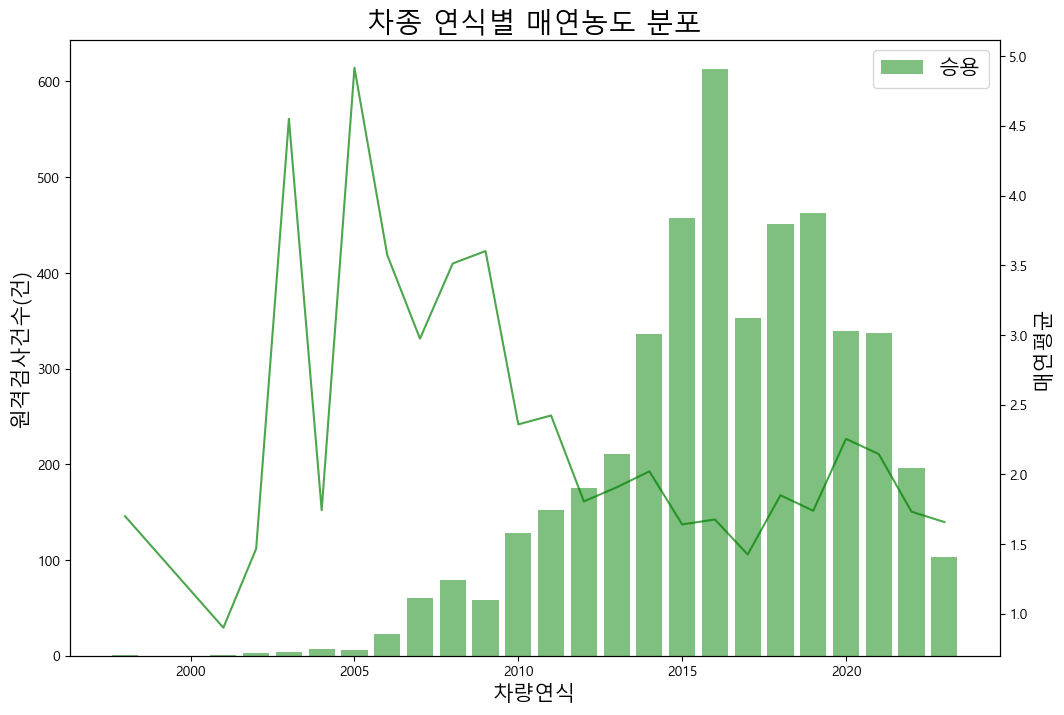

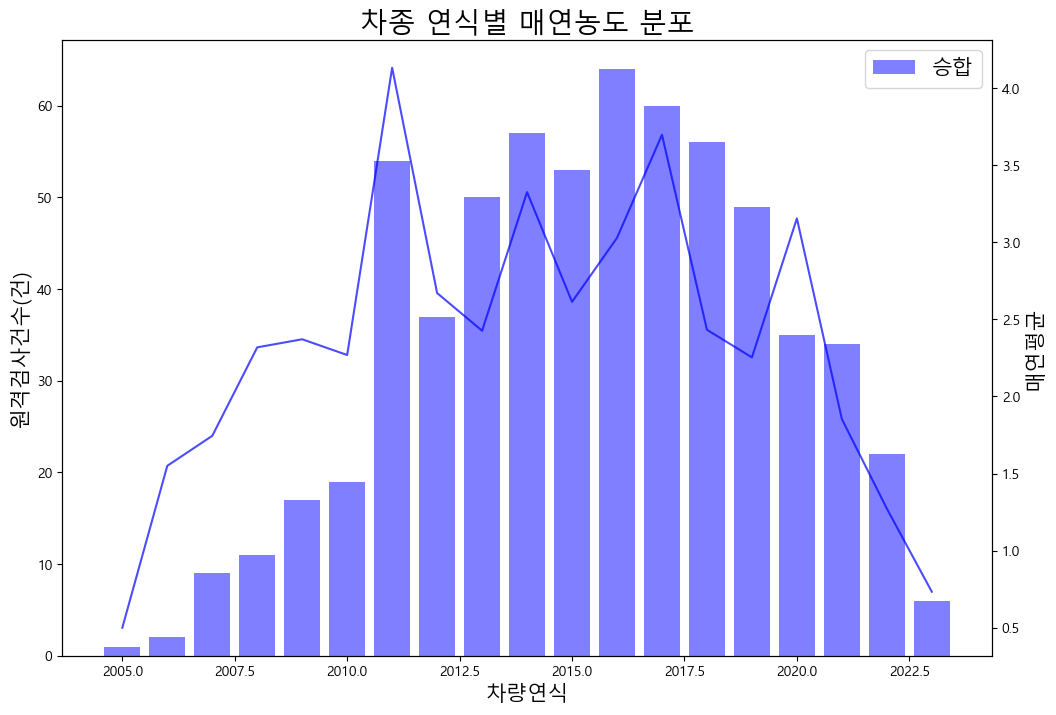

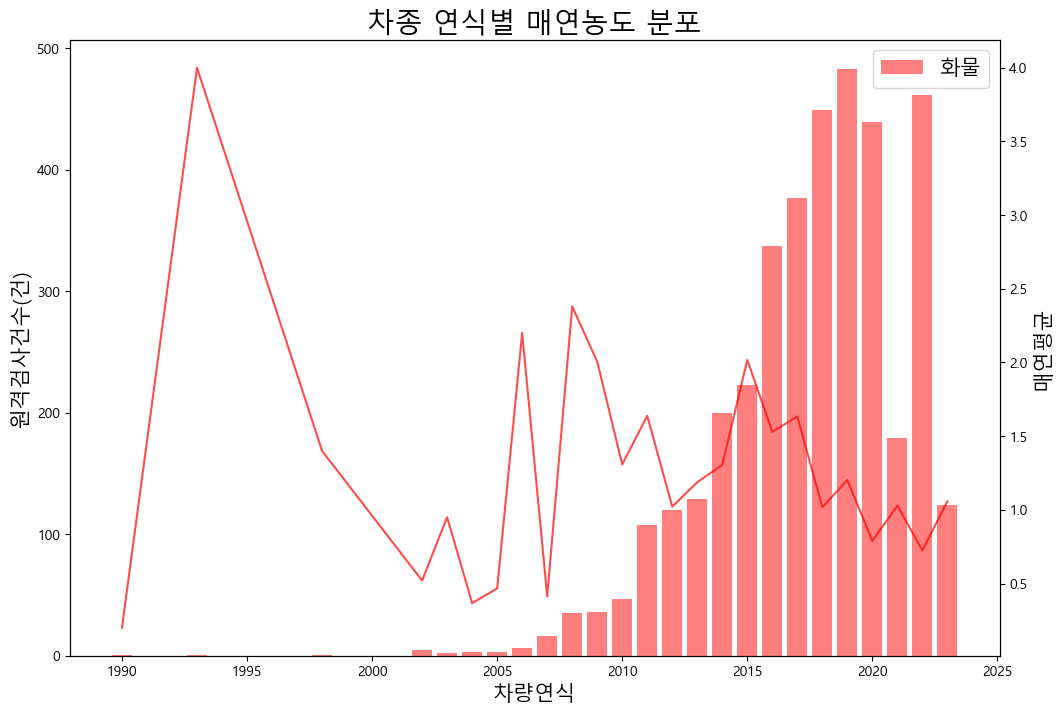

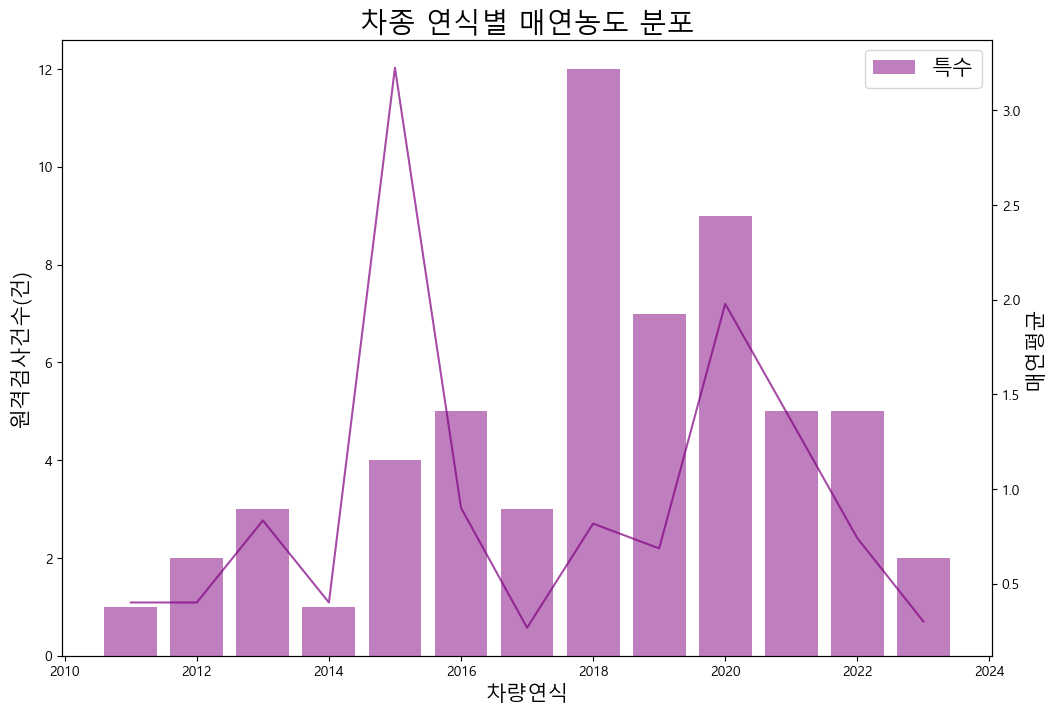

In [535]:
for ty, cr in zip(['ÏäπÏö©', 'ÏäπÌï©', 'ÌôîÎ¨º', 'ÌäπÏàò'], ['g', 'b', 'r', 'purple']):
    temp = grp20[grp20['Ï∞®Ï¢Ö'] == ty]

    fig, ax1 = plt.subplots(figsize=(12, 8))

    ax1.bar(temp['Ï∞®ÎüâÏó∞Ïãù'], temp['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'], color=cr, alpha=0.5, label=ty)

    ax1.legend(fontsize=15)

    ax1.set_title('Ï∞®Ï¢Ö Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞ÎÜçÎèÑ Î∂ÑÌè¨', fontsize=20)
    ax1.set_ylabel('ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)', rotation=90, fontsize=15)
    ax1.set_xlabel('Ï∞®ÎüâÏó∞Ïãù', fontsize=15)

    ax2 = ax1.twinx()
    ax2.plot(temp['Ï∞®ÎüâÏó∞Ïãù'], temp['Îß§Ïó∞ÌèâÍ∑†'], color=cr, alpha=0.7)
    ax2.set_ylabel('Îß§Ïó∞ÌèâÍ∑†', rotation=90, fontsize=15)
    plt.show();

In [548]:
grp20.sort_values('Ï∞®ÎüâÏó∞Ïãù')['Ï∞®ÎüâÏó∞Ïãù'].unique()

array([1990., 1993., 1998., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.])

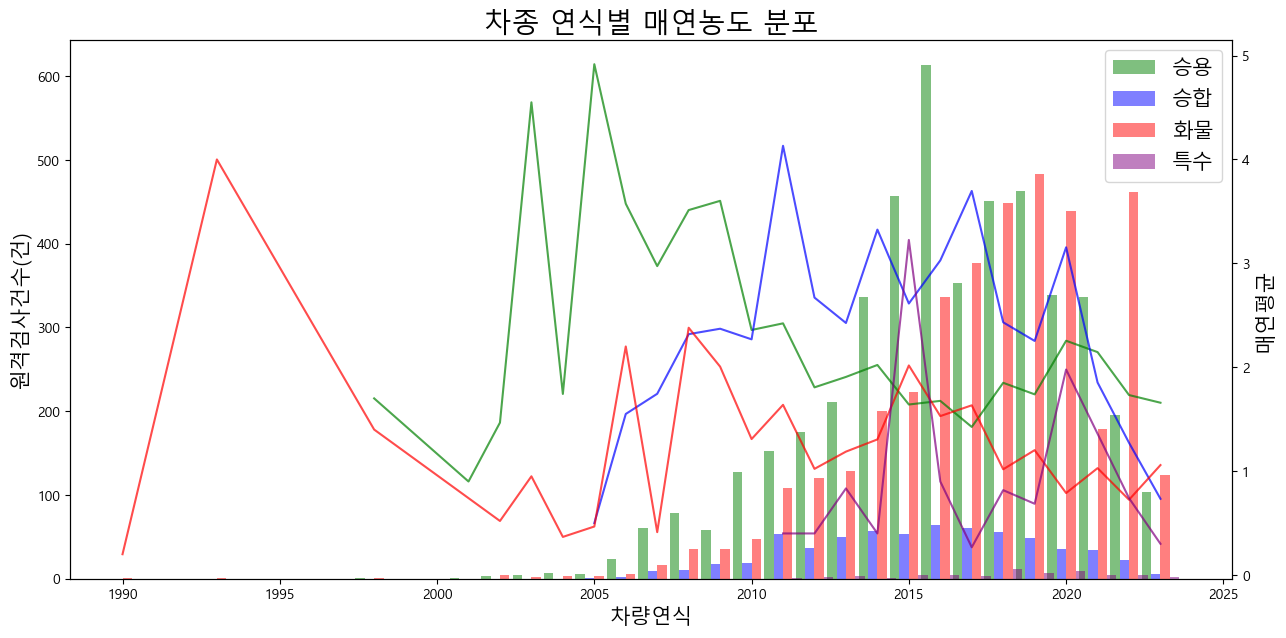

In [560]:
temp1 = grp20[grp20['Ï∞®Ï¢Ö'] == 'ÏäπÏö©']
temp2 = grp20[grp20['Ï∞®Ï¢Ö'] == 'ÏäπÌï©']
temp3 = grp20[grp20['Ï∞®Ï¢Ö'] == 'ÌôîÎ¨º']
temp4 = grp20[grp20['Ï∞®Ï¢Ö'] == 'ÌäπÏàò']

fig, ax1 = plt.subplots(figsize=(15, 7))

bar_width = 0.3

index1 = temp1['Ï∞®ÎüâÏó∞Ïãù'].to_numpy()
index2 = temp2['Ï∞®ÎüâÏó∞Ïãù'].to_numpy()
index3 = temp3['Ï∞®ÎüâÏó∞Ïãù'].to_numpy()
index4 = temp4['Ï∞®ÎüâÏó∞Ïãù'].to_numpy()

ax1.bar(index1 - 0.45, temp1['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'], color='g', alpha=0.5, label='ÏäπÏö©', width=bar_width)
ax1.bar(index2 - 0.15, temp2['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'], color='b', alpha=0.5, label='ÏäπÌï©', width=bar_width)
ax1.bar(index3 + 0.15, temp3['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'], color='r', alpha=0.5, label='ÌôîÎ¨º', width=bar_width)
ax1.bar(index4 + 0.45, temp4['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'], color='purple', alpha=0.5, label='ÌäπÏàò', width=bar_width)
ax1.legend(fontsize=15)

ax1.set_title('Ï∞®Ï¢Ö Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞ÎÜçÎèÑ Î∂ÑÌè¨', fontsize=20)
ax1.set_ylabel('ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò(Í±¥)', rotation=90, fontsize=15)
ax1.set_xlabel('Ï∞®ÎüâÏó∞Ïãù', fontsize=15)

ax2 = ax1.twinx()
ax2.plot(index1, temp1['Îß§Ïó∞ÌèâÍ∑†'], color='g', alpha=0.7)
ax2.plot(index2, temp2['Îß§Ïó∞ÌèâÍ∑†'], color='b', alpha=0.7)
ax2.plot(index3, temp3['Îß§Ïó∞ÌèâÍ∑†'], color='r', alpha=0.7)
ax2.plot(index4, temp4['Îß§Ïó∞ÌèâÍ∑†'], color='purple', alpha=0.7)
ax2.set_ylabel('Îß§Ïó∞ÌèâÍ∑†', rotation=90, fontsize=15)

plt.show();

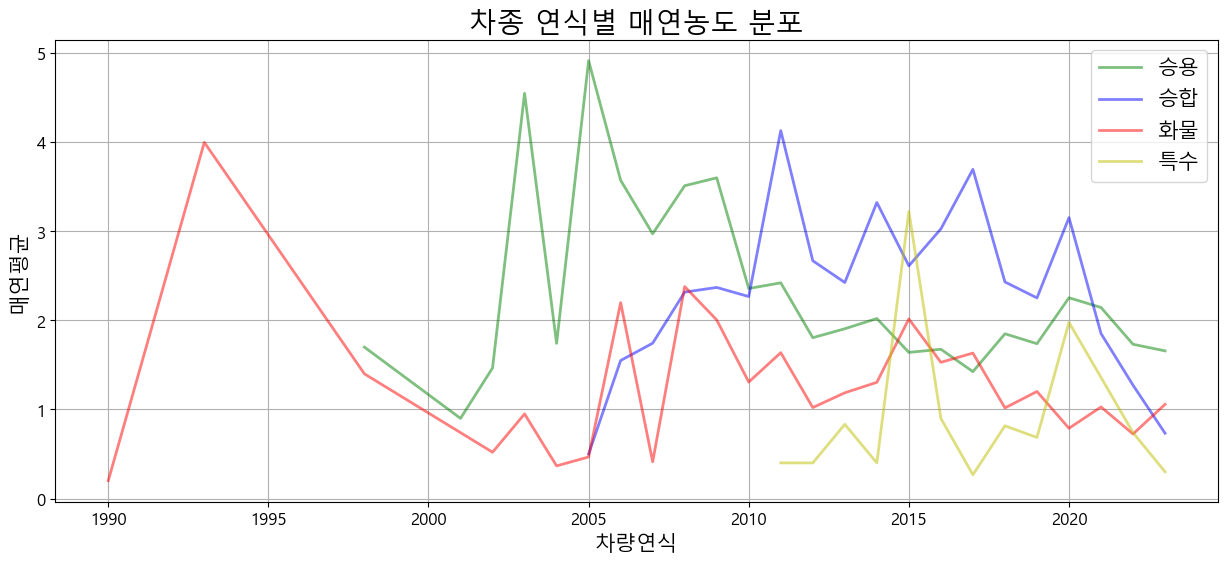

In [574]:
plt.figure(figsize=(15,6))

for ty, cr in zip(['ÏäπÏö©', 'ÏäπÌï©', 'ÌôîÎ¨º', 'ÌäπÏàò'], ['g', 'b', 'r', 'y']):
    temp = grp20[grp20['Ï∞®Ï¢Ö'] == ty]
    index = temp['Ï∞®ÎüâÏó∞Ïãù'].to_numpy()

    plt.plot(index, temp['Îß§Ïó∞ÌèâÍ∑†'], color=cr, alpha=0.5, label=ty, linewidth=2)

plt.grid()
plt.title('Ï∞®Ï¢Ö Ïó∞ÏãùÎ≥Ñ Îß§Ïó∞ÎÜçÎèÑ Î∂ÑÌè¨', fontsize=20)
plt.ylabel('Îß§Ïó∞ÌèâÍ∑†', rotation=90, fontsize=15)
plt.xlabel('Ï∞®ÎüâÏó∞Ïãù', fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(fontsize=15)

plt.savefig(os.path.join(img_fold, 'Îã§Ï∞®ÏÑ†Î∂ÑÏÑù_20Î≤à.png'), bbox_inches='tight')
plt.show();

## 21\. Ï∞®Ï¢Ö + Ïó∞Ïãù + Î∞∞Í∏∞ÎüâÎ≥Ñ Îß§Ïó∞ÎÜçÎèÑ Î∂ÑÌè¨
- Ï∞®Ï¢Ö, Ïó∞Ïãù, Î∞∞Í∏∞ÎüâÎ≥Ñ Îß§Ïó∞ Í∞í ÌèâÍ∑†

In [464]:
grp21 = die.groupby(['Ï∞®Ï¢Ö', 'Ï∞®ÎüâÏó∞Ïãù', 'Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp21 = grp21.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp21

Ï∞®Ï¢Ö    Ï∞®ÎüâÏó∞Ïãù            Î∞∞Í∏∞ÎüâÍµ¨Î∂Ñ  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0    ÏäπÏö© 1998.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  1.70       1
1    ÏäπÏö© 2001.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  0.90       1
2    ÏäπÏö© 2002.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  1.47       3
3    ÏäπÏö© 2003.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  4.55       4
4    ÏäπÏö© 2004.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  1.74       7
..   ..     ...              ...   ...     ...
126  ÌôîÎ¨º 2022.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  0.73     458
127  ÌôîÎ¨º 2022.00  10000Ïù¥ÏÉÅ 15000ÎØ∏Îßå  0.00       1
128  ÌôîÎ¨º 2022.00   5000Ïù¥ÏÉÅ 10000ÎØ∏Îßå  0.40       3
129  ÌôîÎ¨º 2023.00       0Ïù¥ÏÉÅ 5000ÎØ∏Îßå  0.91     115
130  ÌôîÎ¨º 2023.00   5000Ïù¥ÏÉÅ 10000ÎØ∏Îßå  2.97       9

[131 rows x 5 columns]

In [453]:
grp21['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

## 22\. ÏóîÏßÑÌòïÏãùÎ≥Ñ Î∂ÑÌè¨
- ÏóîÏßÑÌòïÏãùÎ≥Ñ Îß§Ïó∞ Í∞í ÌèâÍ∑†

In [465]:
grp22 = die.groupby(['ÏóîÏßÑÌòïÏãù'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp22 = grp22.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp22

ÏóîÏßÑÌòïÏãù  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0    204DT  2.76      37
1    224DT  2.47       9
2    276DT  0.70       1
3    306D3  1.67       3
4    306DT  0.89      14
..     ...   ...     ...
185      Y  5.30       4
186   YH01  1.23       4
187  Z20D1  1.00      58
188   Z20S  2.39      29
189  Z22D1  1.40       3

[190 rows x 3 columns]

In [455]:
grp22['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

In [579]:
grp22['Îß§Ïó∞ÌèâÍ∑†'].max()

10.0

In [577]:
grp22.loc[grp22['Îß§Ïó∞ÌèâÍ∑†'] == grp22['Îß§Ïó∞ÌèâÍ∑†'].max(), 'ÏóîÏßÑÌòïÏãù']

180    T8MA
Name: ÏóîÏßÑÌòïÏãù, dtype: object

In [578]:
die.loc[die['ÏóîÏßÑÌòïÏãù'] == 'T8MA', ['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï†úÏûëÏÇ¨Î™Ö', 'Ï∞®Î™Ö']]

ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏            Ï†úÏûëÏÇ¨Î™Ö            Ï∞®Î™Ö
6249  68ÎàÑ6724  Ìè¨ÎìúÏÑ∏ÏùºÏ¶àÏÑúÎπÑÏä§ÏΩîÎ¶¨ÏïÑ(Ï£º)  Kuga 2.0 AWD
8373  24Ï£º0686  Ìè¨ÎìúÏÑ∏ÏùºÏ¶àÏÑúÎπÑÏä§ÏΩîÎ¶¨ÏïÑ(Ï£º)  Kuga 2.0 AWD

In [580]:
grp22['Îß§Ïó∞ÌèâÍ∑†'].min()

0.0

In [581]:
grp22.loc[grp22['Îß§Ïó∞ÌèâÍ∑†'] == grp22['Îß§Ïó∞ÌèâÍ∑†'].min(), 'ÏóîÏßÑÌòïÏãù']

113        D6CA
130     DC13155
140        DL08
147    F3BE3681
Name: ÏóîÏßÑÌòïÏãù, dtype: object

In [582]:
die.loc[die['ÏóîÏßÑÌòïÏãù'] == 'D6CA', ['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï†úÏûëÏÇ¨Î™Ö', 'Ï∞®Î™Ö']]

ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏      Ï†úÏûëÏÇ¨Î™Ö      Ï∞®Î™Ö
8731  Í≤ΩÍ∏∞86ÏïÑ2053  ÌòÑÎåÄÏûêÎèôÏ∞®(Ï£º)  ÌòÑÎåÄÏäàÌçºÌä∏Îü≠

In [583]:
die.loc[die['ÏóîÏßÑÌòïÏãù'] == 'DC13155', ['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï†úÏûëÏÇ¨Î™Ö', 'Ï∞®Î™Ö']]

ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏       Ï†úÏûëÏÇ¨Î™Ö            Ï∞®Î™Ö
271  Ï†ÑÎ∂Å80ÏÇ¨1912  Ï£ºÏãùÌöåÏÇ¨ Ï†ÑÍµ≠ÌäπÏû•  Ï†ÑÍµ≠23.8ÌÜ§ÏÉÅÏäπÏúôÎ∞îÎîî

In [584]:
die.loc[die['ÏóîÏßÑÌòïÏãù'] == 'DL08', ['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï†úÏûëÏÇ¨Î™Ö', 'Ï∞®Î™Ö']]

ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏          Ï†úÏûëÏÇ¨Î™Ö     Ï∞®Î™Ö
3206  75Î≥¥6465  ÏûêÏùºÎåÄÏö∞ÏÉÅÏö©Ï∞® Ï£ºÏãùÌöåÏÇ¨  BH090

In [585]:
die.loc[die['ÏóîÏßÑÌòïÏãù'] == 'F3BE3681', ['ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏', 'Ï†úÏûëÏÇ¨Î™Ö', 'Ï∞®Î™Ö']]

ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏        Ï†úÏûëÏÇ¨Î™Ö         Ï∞®Î™Ö
3258  Í≤ΩÍ∏∞91Î∞î9637  ÌÉÄÌÉÄÎåÄÏö∞ÏÉÅÏö©Ï∞®(Ï£º)  ÎåÄÏö∞25ÌÜ§Ïπ¥Í≥†Ìä∏Îü≠

## 23\. Ï∞®ÎüâÏ†úÏûëÏÇ¨Î≥Ñ Î∂ÑÌè¨
- Ï†úÏûëÏÇ¨Î™ÖÎ≥Ñ Îß§Ïó∞ Í∞í ÌèâÍ∑†

In [467]:
grp23 = die.groupby(['Ï†úÏûëÏÇ¨Î™Ö'], dropna=False).agg({'Îß§Ïó∞':'mean', 'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'count'}).reset_index()
grp23 = grp23.rename(columns={'ÏûêÎèôÏ∞®Îì±Î°ùÎ≤àÌò∏':'ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò', 'Îß§Ïó∞':'Îß§Ïó∞ÌèâÍ∑†'})
grp23

Ï†úÏûëÏÇ¨Î™Ö  Îß§Ïó∞ÌèâÍ∑†  ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò
0      (Ïú†)ÎèôÏñëÌäπÏû•Ï∞®  0.40       1
1       (Ï£º) Í≥®ÎìúÎ∞¥  0.40       2
2   (Ï£º) ÏÇºÏò§ÌäπÏû•ÏûêÎèôÏ∞®  0.50       1
3     (Ï£º) ÏóêÏù¥Ïó†ÌäπÏû•  0.30       1
4        (Ï£º) Ïò§ÌÖç  0.45      10
..          ...   ...     ...
87   ÌïúÍµ≠Ïì∞Î¶¨Ï∂ïÍ≥µÏóÖ(Ï£º)  0.60       2
88    ÌïúÍµ≠ÌäπÏû•Í∏∞Ïà†(Ï£º)  0.67       3
89     ÌïúÎ∂àÎ™®ÌÑ∞Ïä§(Ï£º)  1.20      17
90         ÌïúÏã†ÌäπÏû•  0.40       3
91     ÌòÑÎåÄÏûêÎèôÏ∞®(Ï£º)  1.76    4201

[92 rows x 3 columns]

In [468]:
grp23['ÏõêÍ≤©Í≤ÄÏÇ¨Í±¥Ïàò'].sum()

9037

In [587]:
grp23.loc[grp23['Îß§Ïó∞ÌèâÍ∑†'] == grp23['Îß§Ïó∞ÌèâÍ∑†'].max(), ['Ï†úÏûëÏÇ¨Î™Ö', 'Îß§Ïó∞ÌèâÍ∑†']]

Ï†úÏûëÏÇ¨Î™Ö  Îß§Ïó∞ÌèâÍ∑†
72  Ï£ºÏãùÌöåÏÇ¨ ÌïúÏ§ëÌäπÏû• 16.30

In [588]:
grp23.loc[grp23['Îß§Ïó∞ÌèâÍ∑†'] == grp23['Îß§Ïó∞ÌèâÍ∑†'].min(), ['Ï†úÏûëÏÇ¨Î™Ö', 'Îß§Ïó∞ÌèâÍ∑†']]

Ï†úÏûëÏÇ¨Î™Ö  Îß§Ïó∞ÌèâÍ∑†
7        (Ï£º)Îã§Î≥µÌäπÏû•  0.00
26       (Ï£º)ÌïúÍµ≠ÌÜ†ÎØ∏  0.00
48    Ïã†ÏòÅÌäπÏû•Ïó†ÏóîÏî®(Ï£º)  0.00
49  Ïã†Ï†ïÍ∞úÎ∞úÌäπÏû•Ï∞® Ï£ºÏãùÌöåÏÇ¨  0.00
62         Ï†ïÎ∂ÄÏì∞Î¶¨Ï∂ï  0.00
67     Ï£ºÏãùÌöåÏÇ¨ Ï†ÑÍµ≠ÌäπÏû•  0.00

## Í≤∞Í≥º Ï∂úÎ†•

In [462]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20230830'

In [475]:
with pd.ExcelWriter(os.path.join(an_fold, f'Îã§Ï∞®ÏÑ†_Ï∏°Ï†ïÍ≤∞Í≥º_Î∂ÑÏÑù({today_date}).xlsx')) as writer:
    grp1.to_excel(writer, sheet_name='1_ÏùºÏûêÎ≥Ñ_Ï∏°Ï†ïÍ±¥Ïàò', index=False)
    grp2.to_excel(writer, sheet_name='2_ÏãúÍ∞ÑÎåÄÎ≥Ñ_Ï∏°Ï†ïÍ±¥Ïàò', index=False)
    grp3.to_excel(writer, sheet_name='3_ÏöîÏùºÎ≥Ñ_Ï∏°Ï†ïÍ±¥Ïàò', index=False)
    # grp4.to_excel(writer, sheet_name='4_Ï∞®ÏÑ†Î≥Ñ_Ï∏°Ï†ïÍ±¥Ïàò', index=False) # Îç∞Ïù¥ÌÑ∞ Î∂ÄÏû¨
    grp5.to_excel(writer, sheet_name='5_Ï∞®Ï¢ÖÎ≥Ñ_Ï∏°Ï†ïÍ±¥Ïàò', index=False)
    grp6.to_excel(writer, sheet_name='6_Îß§Ïó∞Ï∏°Ï†ï_ÌÜµÍ≥Ñ', index=False)
    # grp7.to_excel(writer, sheet_name='7_Ï∞®ÏÑ†Î≥Ñ_Îß§Ïó∞Ï∏°Ï†ï_ÌÜµÍ≥Ñ', index=False) # Îç∞Ïù¥ÌÑ∞ Î∂ÄÏû¨
    grp8.to_excel(writer, sheet_name='8_ÏÜçÎèÑÎ≥Ñ_Îß§Ïó∞Ï∏°Ï†ï_ÌÜµÍ≥Ñ', index=False)
    grp9.to_excel(writer, sheet_name='9_Îß§Ïó∞ÎÜçÎèÑÎ≥Ñ_Ï∏°Ï†ïÍ±¥Ïàò_ÎπÑÏú®', index=False)
    # grp10.to_excel(writer, sheet_name='10_Ï∞®ÏÑ†Î≥Ñ_Îß§Ïó∞Ï∏°Ï†ïÌÜµÍ≥Ñ', index=False) # 7Î≤àÍ≥º ÎèôÏùº
    # grp11.to_excel(writer, sheet_name='11_ÏÜçÎèÑÎ≥Ñ_Îß§Ïó∞Ï∏°Ï†ï_ÌÜµÍ≥Ñ', index=False) # 8Î≤àÍ≥º ÎèôÏùº
    grp12.to_excel(writer, sheet_name='12_Îß§Ïó∞ÎÜçÎèÑ_ÏÉÅÏúÑ10%Ïùò_Ï†ïÎ∞ÄÍ≤ÄÏÇ¨_Í≤∞Í≥º', index=False) # ÏÇ¨Ïö©Ìï† Í≤ÄÏÇ¨ ÎØ∏Ï†ï
    # grp13.to_excel(writer, sheet_name='13_ÏãúÌóòÏùº_ÌõÑ_ÏµúÏ¥àÍ≤ÄÏÇ¨_Î∂ÄÏ†ÅÌï©', index=False) # Ìï¥ÎãπÎêòÎäî Ï∞®Îüâ ÏóÜÏùå
    # grp14.to_excel(writer, sheet_name='14_ÏãúÌóòÏùº_ÌõÑ_ÏµúÏ¢ÖÍ≤ÄÏÇ¨_Î∂ÄÏ†ÅÌï©', index=False) # Ìï¥ÎãπÎêòÎäî Ï∞®Îüâ ÏóÜÏùå
    grp15.to_excel(writer, sheet_name='15_Ï∞®Ï¢ÖÎ≥Ñ_Îß§Ïó∞_ÎÜçÎèÑ_Î∂ÑÌè¨', index=False)
    grp16.to_excel(writer, sheet_name='16_Ïó∞ÏãùÎ≥Ñ_Îß§Ïó∞_ÎÜçÎèÑ_Î∂ÑÌè¨', index=False)
    grp17.to_excel(writer, sheet_name='17_Î∞∞Í∏∞ÎüâÎ≥Ñ_Îß§Ïó∞_ÎÜçÎèÑ_Î∂ÑÌè¨', index=False)
    grp18.to_excel(writer, sheet_name='18_Ï∞®ÎüâÏ§ëÎüâÎ≥Ñ_Îß§Ïó∞_ÎÜçÎèÑ_Î∂ÑÌè¨', index=False)
    grp19.to_excel(writer, sheet_name='19_Ï¢ÖÌï©Í≤ÄÏÇ¨_Îß§Ïó∞ÌóàÏö©Í∏∞Ï§ÄÎ≥Ñ_Î∂ÑÌè¨', index=False)
    grp20.to_excel(writer, sheet_name='20_Ï∞®Ï¢Ö_Ïó∞ÏãùÎ≥Ñ_Îß§Ïó∞_ÎÜçÎèÑ_Î∂ÑÌè¨', index=False)
    grp21.to_excel(writer, sheet_name='21_Ï∞®Ï¢Ö_Ïó∞Ïãù_Î∞∞Í∏∞ÎüâÎ≥Ñ_Îß§Ïó∞_ÎÜçÎèÑ_Î∂ÑÌè¨', index=False)
    grp22.to_excel(writer, sheet_name='22_ÏóîÏßÑÌòïÏãùÎ≥Ñ_Î∂ÑÌè¨', index=False)
    grp23.to_excel(writer, sheet_name='23_Ï∞®ÎüâÏ†úÏûëÏÇ¨Î≥Ñ_Î∂ÑÌè¨', index=False)

In [461]:
sec = time.time() - start_time
print(str(dt.timedelta(seconds=sec)).split('.')[0])

22:10:40


# End